## Contents

- [Part 1: Problem Statement](#Part-1:-Proposal)
	- [About the dataset](#About-the-dataset)
	- [Data Upload](#Data-Upload)
	- [Data Cleaning - inspecting training dataset](#Data-Cleaning---inspecting-training-dataset)
- [Part 2: Brief](#Part-2:-Data-Exploration)
    - [Exploration](#)
        - [Basic EDA](#Basic-EDA-of-Overall-Dataset)
        - [Treatment of Outliers](#Treatment-of-Outliers)
        - [EDA by Loan Status](#EDA-by-Loan-Status)
	- [Classification of Eligible Customers](#Classification-of-Eligible-Customers)
        - [K-Means Clustering](#K-means-Clustering)
        - [DBSCAN](#DBSCAN-Clustering)
        - [Heirarchical](#Heirarchical-Clustering)
    - [Conclusion](#Conclusion-for-EDA)
- [Part 3: Modelling](#Part-3:-Modelling)
	- [Objective 1: Assessing Eligibility for pending customers](#Objective-1:-Determine-Loan-Eligibility-based-on-profile-of-customer)
        - [Step 1: Prepping variables for model](#Step-1:-Prepping-variables-for-model)
            - [Setting Variables](#Setting-Variables-(Target-and-Features))
            - [Converting categorical variables to numerical variables](#Converting-categorical-variables-to-numerical-variables¶)
            - [Checking for multicollinearity and importance of features](#Checking-for-multicollinearity-and-importance-of-features¶)
            - [Train/test split](#Train/test-split)
            - [Transformation on Target dataset (customer records without Loan Status Assigned)](#Transformation-on-Target-dataset-(customer-records-without-Loan-Status-Assigned))
        - [Step 2: Modelling](#Step-2:-Building-Model-&-Success-Metrics)
            - [Logistic Regression](#Logistic-Regression-Model)
                - [Score and Metrics](#Score-and-Metrics-(LogReg))
            - [KNN Nearest Neighbour](#KNN-Nearest-Model)
                - [Score and Metrics](#Score-and-Metrics-(KNN))
            - [Target Dataset prediction of Loan Status](#Target-Dataset-prediction-of-Loan-Status)
        - [Input Form to Assess Loan Eligibility using models](#Input-Form-to-determine-Eligibility)
    - [Objective 2: Estimated Loan Amount based on Customer Profile](#Objective-2:-Estimate-Loan-Amount-to-be-provided-using-Linear-Regression)
        - [Linear Regression](#Linear-Regression)
        - [Input Form to Assess Loan Amount for Customer](#Input-Form-to-Assess-Loan-Amount-for-Customer)
- [Conclusion](#)

## Part 1: *Proposal*

- [Return to Contents](#Contents)

### Problem Statement 

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan. Currently, this process is manual and dealt with on a case-by-case basis, resulting in manpower, time and investment spent. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. The company also maintains a pipeline of clients whom they have yet to assess if they are eligible for a Home loan. 

These details required on the online application form are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 

**Objective**

To automate this process, they have provided a dataset to:

> * Identify the customers segments that are eligible for loan amount (Segmentation of customers currently served)
> * Create an efficient model to assess eligibility of a customer based on their profile
> * Estimate the max loan that can be provided to the customer using regression

**Hypothesis/assumptions**

> *Assumption 1* - The past loan eligibility assessments are accurate

> *Assumption 2* - No other additional datapoints aside from the data features available within the dataset are relevant for the assessment

> *Assumption 3* - The company has no limits in loan provision for customers, and all loans that have been provided will be repaid on time

> *Assumption 4* - Credit History of a customer is static and would not change over time. Each customer only takes on 1 loan. Every customer is a new applicant, no repeat customers on dataset (Also, no customer id is given, just loan id)

**Goals and success metrics**

> *Goal* - Identify efficient models for loan status assessment and loan amount estmation, with relatively low errors and better accuracy, and with minimal multicollinearily

> *Metrics:* RMSE and R2 score for linear regression, accuracy for classification models, silhouette score for clustering models 

**Risks or limitations**

> * Limitation 1 - Online Application forms are subject to human error (e.g. misspelling in inputs, wrong format of inputs), which may result in issues running the models
> * Limitation 2 - Credit history may change over time as more debt is undertaken by the customers, we are assuming tha Credit history on file doesnt change. The models are point-in-time models. In reality, the credit history is regularly assessed for the customer's ability to make repayments. 


#### Data Dictionary

|Variable            |Description                                   |
|--------------------|----------------------------------------------|
|Loan_ID             |Unique Loan ID                                |
|Gender              |Male/Female                                   |
|Married	         |Applicant married (Y/N)                       | 
|Dependents          |Number of dependents                          |
|Education           |Applicant Education (Graduate/Under Graduate) |
|Self_Employed       |Self employed (Y/N)                           |
|ApplicantIncome     |Applicant income (monthly)                    |
|CoapplicantIncome   |Coapplicant income (monthly)                  |
|LoanAmount          |Loan amount in thousands                      |
|LoanAmountTerm      |Term of loan in months                        |
|Credit_History      |Credit history meets guidelines(1=good, 0=bad)|
|Property_Area       |Urban/Semi Urban/Rural                        |
|Loan_Status (Target)|Loan approved (Y/N)                           |

#### Data Upload

In [282]:
# Read the data into a DataFrame.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

data1 ='Loan Eligibility Process/training_set.csv'
data2 = 'Loan Eligibility Process/testing_set.csv'
traind = pd.read_csv(data1)
testd = pd.read_csv(data2)
final=pd.concat([traind, testd], axis=0)

#### Data Cleaning - inspecting training dataset

In [283]:
final.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [284]:
final.shape

(981, 13)

In [285]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             955 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          980 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    979 non-null    float64
 7   CoapplicantIncome  980 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 107.3+ KB


In [286]:
#List of null values in each column that need to be cleaned
final.isnull().sum()

Loan_ID                0
Gender                26
Married                3
Dependents            25
Education              1
Self_Employed         55
ApplicantIncome        2
CoapplicantIncome      1
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
property_Area          0
Loan_Status          367
dtype: int64

In [287]:
#Gender is a field we need to run a prediction/regression analysis, Gender cannot be assumed, removing rows with no gender
final.dropna(subset=['Gender'],inplace=True)


In [288]:
#Credit History, and Dependents count shouldnt be assumed if not given, they are still extremely relevane to this analysis, removing the rows with null values 
final.dropna(subset=['Credit_History'],inplace=True)
#final.dropna(subset=['Dependents'],inplace=True)
final.dropna(subset=['Self_Employed'],inplace=True)


In [289]:
final.isnull().sum()

Loan_ID                0
Gender                 0
Married                3
Dependents            22
Education              1
Self_Employed          0
ApplicantIncome        2
CoapplicantIncome      0
LoanAmount            26
Loan_Amount_Term      18
Credit_History         0
property_Area          0
Loan_Status          305
dtype: int64

In [290]:
#Assume that customers that didnt fill in the number of dependents have 0 dependents 
final.Dependents.fillna(value='0', inplace=True)

In [291]:
final['Dependents'].value_counts()

0     487
2     137
1     131
3+     75
Name: Dependents, dtype: int64

In [292]:
#Making an assumption that on average, families with more than 2 kids would have 3 kids on average
final['Dependents'].replace({'3+':'3'},inplace=True)

In [293]:
#Education Field - Guaging Education based on Income 
final[final['Education'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
8,LP001018,Male,Yes,2,NaN,No,4006.0,1526.0,168.0,360.0,1.0,Urban,Y


In [294]:
final[final['Education']=='Graduate'].ApplicantIncome.mean()

5470.923913043478

In [295]:
final[final['Education']=='Graduate'].CoapplicantIncome.mean()

1611.7831578771518

In [296]:
final[final['Education']=='Not Graduate'].ApplicantIncome.mean()

3733.8360655737706

In [297]:
final[final['Education']=='Not Graduate'].CoapplicantIncome.mean()

1275.8907103825136

In [298]:
#Looking at the above, income of the indivual with missing Education info is closer to that of an avg non-graduate
final.Education.fillna(value='Not Graduate', inplace=True)

In [299]:
#Inspecting ApplicantIncome field 
final[final['ApplicantIncome'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
15,LP001032,Male,No,0,Graduate,No,NaN,0.0,125.0,360.0,1.0,Urban,Y


In [300]:
final.Loan_Status.value_counts()

Y    355
N    170
Name: Loan_Status, dtype: int64

In [301]:
mask1=(final.Loan_Status=='N') & (final.Education =='Graduate' ) & (final.Self_Employed=='No') & (final.Gender=='Male') & (final.Married=='Yes') &(final.property_Area=='Rural')
      #& traind.Education =='Graduate' & traind.Self_Employed=='No')
mean1 = final[mask1].ApplicantIncome.mean()
mean1

10785.235294117647

In [302]:
#Row 1 
final.at[1,'ApplicantIncome']=mean1

In [303]:
mask2=(final.Loan_Status=='Y') & (final.Education =='Graduate' ) & (final.Self_Employed=='No') & (final.Gender=='Male') & (final.Married=='No') &(final.property_Area=='Urban')
      #& traind.Education =='Graduate' & traind.Self_Employed=='No')
mean2 = final[mask2].ApplicantIncome.mean()
mean2

4084.6875

In [304]:
#Row 15
final.at[15,'ApplicantIncome']=mean2

In [305]:
#check on remaining missing values
final.isnull().sum()

Loan_ID                0
Gender                 0
Married                3
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            26
Loan_Amount_Term      18
Credit_History         0
property_Area          0
Loan_Status          305
dtype: int64

In [306]:
#inspecting null Married entries
final[final['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
104,LP001357,Male,NaN,0,Graduate,No,3816.0,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,0,Graduate,No,4758.0,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,0,Graduate,No,10047.0,0.0,NaN,240.0,1.0,Semiurban,Y


In [307]:
#Assuming that Married info was not given, as customers are not married 
final.Married.fillna(value='No', inplace=True)

In [308]:
#check on remaining missing values
final.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            26
Loan_Amount_Term      18
Credit_History         0
property_Area          0
Loan_Status          305
dtype: int64

In [309]:
final[final['ApplicantIncome'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status


In [310]:
mask3=(final.Loan_Status=='N') &(final.CoapplicantIncome<2000) &(final.Self_Employed=='No') & (final.Married=='Yes')&(final.Gender=='Male') &(final.property_Area=='Rural')&(final.Credit_History==1)&(final.Loan_Amount_Term==360)
      #& traind.Education =='Graduate' & traind.Self_Employed=='No')
mean3 = final[mask3].ApplicantIncome.mean()
mean3

5753.803921568628

In [311]:
final.ApplicantIncome.fillna(value=mean3, inplace=True)

In [312]:
#check on remaining missing values
final.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            26
Loan_Amount_Term      18
Credit_History         0
property_Area          0
Loan_Status          305
dtype: int64

In [313]:
final['LoanAmount']=final['LoanAmount'].fillna(final['LoanAmount'].mean())
final['Loan_Amount_Term']=final['Loan_Amount_Term'].fillna(final['Loan_Amount_Term'].mean())

In [314]:
#Dataframe of rows with missing Loan Status values - to be used for prediction later
datatest = final[final['Loan_Status'].isnull()]
datatest.head()

datatest['LoanAmount']=datatest['LoanAmount'].fillna(datatest['LoanAmount'].mean())
datatest['Loan_Amount_Term']=datatest['Loan_Amount_Term'].fillna(datatest['Loan_Amount_Term'].mean())
datatest['Loan_Tenor_years']=(datatest['Loan_Amount_Term']/12)
datatest.head()

/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/2367758810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatest['LoanAmount']=datatest['LoanAmount'].fillna(datatest['LoanAmount'].mean())
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/2367758810.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatest['Loan_Amount_Term']=datatest['Loan_Amount_Term'].fillna(datatest['Loan_Amount_Term'].mean())
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/23677588

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,Loan_Tenor_years
0,LP001015,Male,Yes,0,Graduate,No,5720.000000,0.0,110.0,360.0,1.0,Urban,NaN,30.0
1,LP001022,Male,Yes,1,Graduate,No,10785.235294,1500.0,126.0,360.0,1.0,Urban,NaN,30.0
2,LP001031,Male,Yes,2,Graduate,No,5000.000000,1800.0,208.0,360.0,1.0,Urban,NaN,30.0
4,LP001051,Male,No,0,Not Graduate,No,3276.000000,0.0,78.0,360.0,1.0,Urban,NaN,30.0
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165.000000,3422.0,152.0,360.0,1.0,Urban,NaN,30.0


In [315]:
#treatment of remaining missing values 
final.dropna(subset=['Loan_Status'],inplace=True)

In [316]:
final.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

In [317]:
#final['Loan_Tenor_years']=(final['Loan_Amount_Term']/12)

## Part 2: *Data Exploration*

- [Return to Contents](#Contents)


In [318]:
final.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
count,525,525,525,525,525,525,525.000000,525.000000,525.000000,525.000000,525.000000,525,525
unique,525,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,431,338,309,410,454,NaN,NaN,NaN,NaN,NaN,203,355
mean,NaN,NaN,NaN,NaN,NaN,NaN,5314.660805,1543.098895,143.376318,342.353713,0.838095,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5513.094653,2534.665147,77.260413,64.390993,0.368715,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,36.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2895.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3858.000000,1041.000000,130.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5819.000000,2250.000000,164.000000,360.000000,1.000000,NaN,NaN


##### Basic EDA of Overall Dataset

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

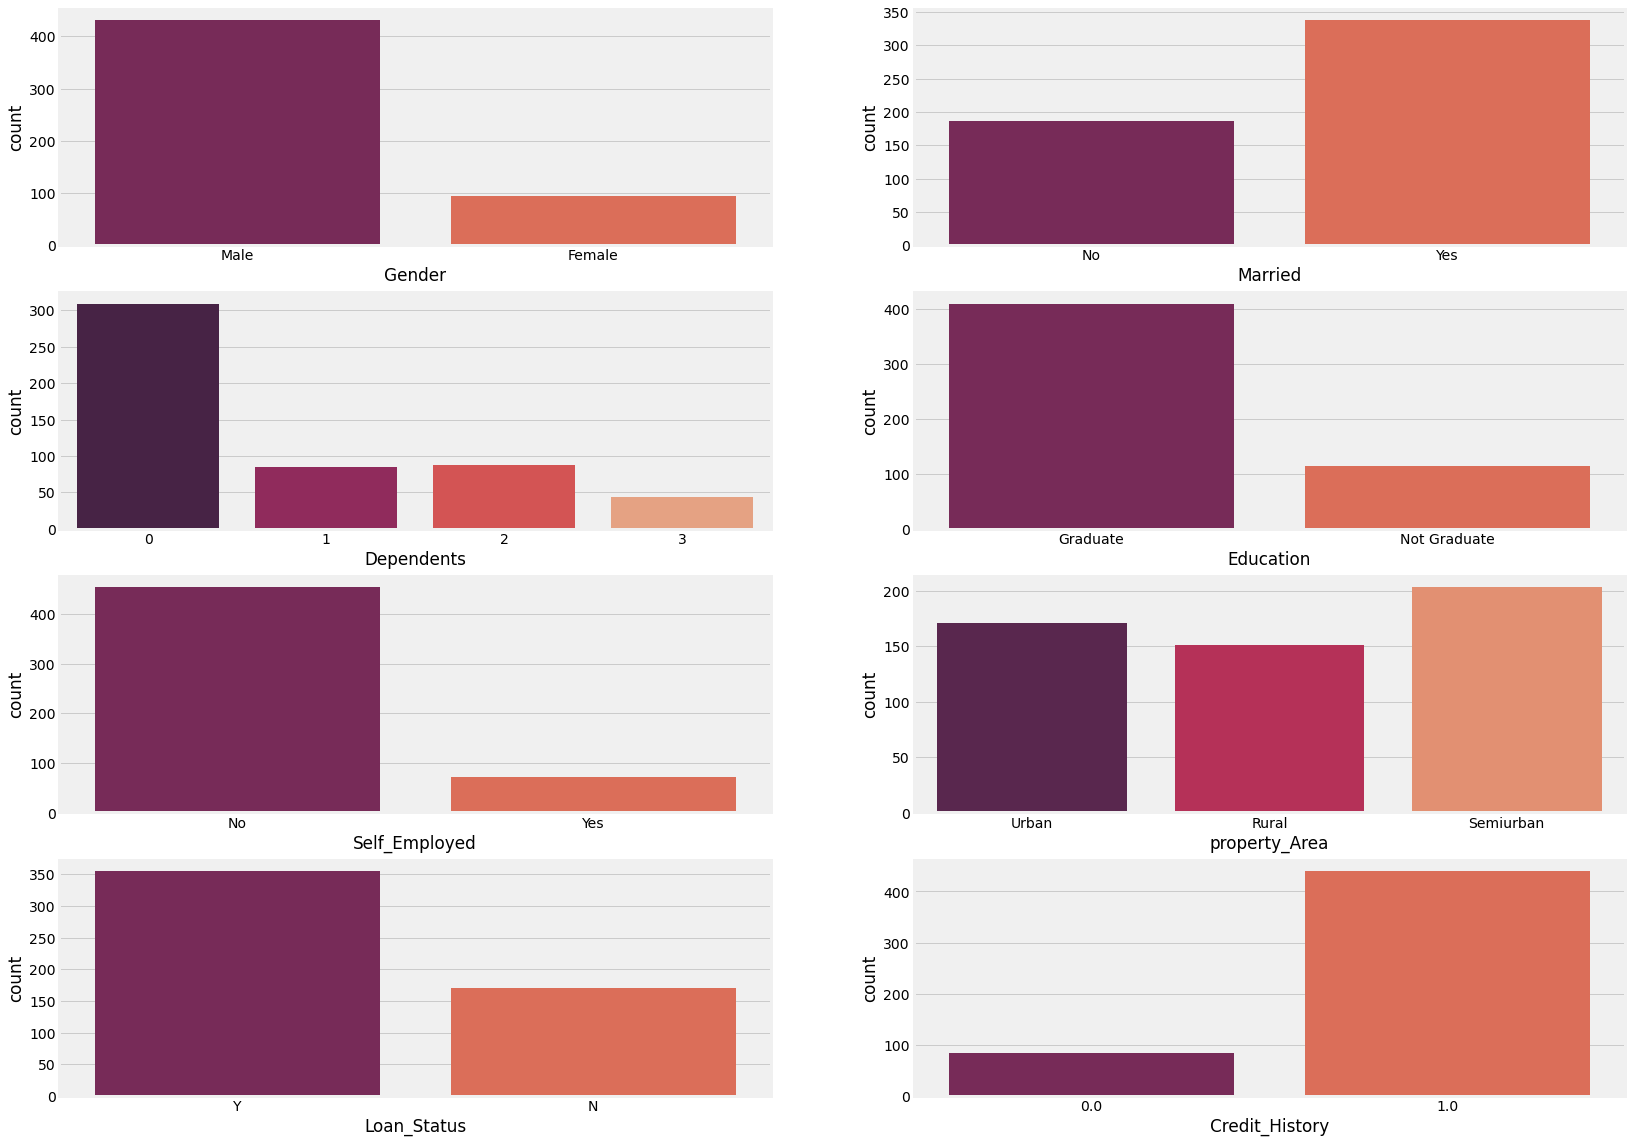

In [319]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender', palette = "rocket", data = final)

plt.subplot(4,2,2)
sns.countplot(x = 'Married', palette = "rocket", data = final)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', palette = "rocket", data = final,order=('0','1','2','3'))

plt.subplot(4,2,4)
sns.countplot(x = 'Education', palette = "rocket", data = final)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', palette = "rocket", data = final)

plt.subplot(4,2,6)
sns.countplot(x = 'property_Area', palette = "rocket", data = final)

plt.subplot(4,2,7)
sns.countplot(x = 'Loan_Status', palette = "rocket", data = final)

plt.subplot(4,2,8)
sns.countplot(x = 'Credit_History', palette = "rocket", data = final)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

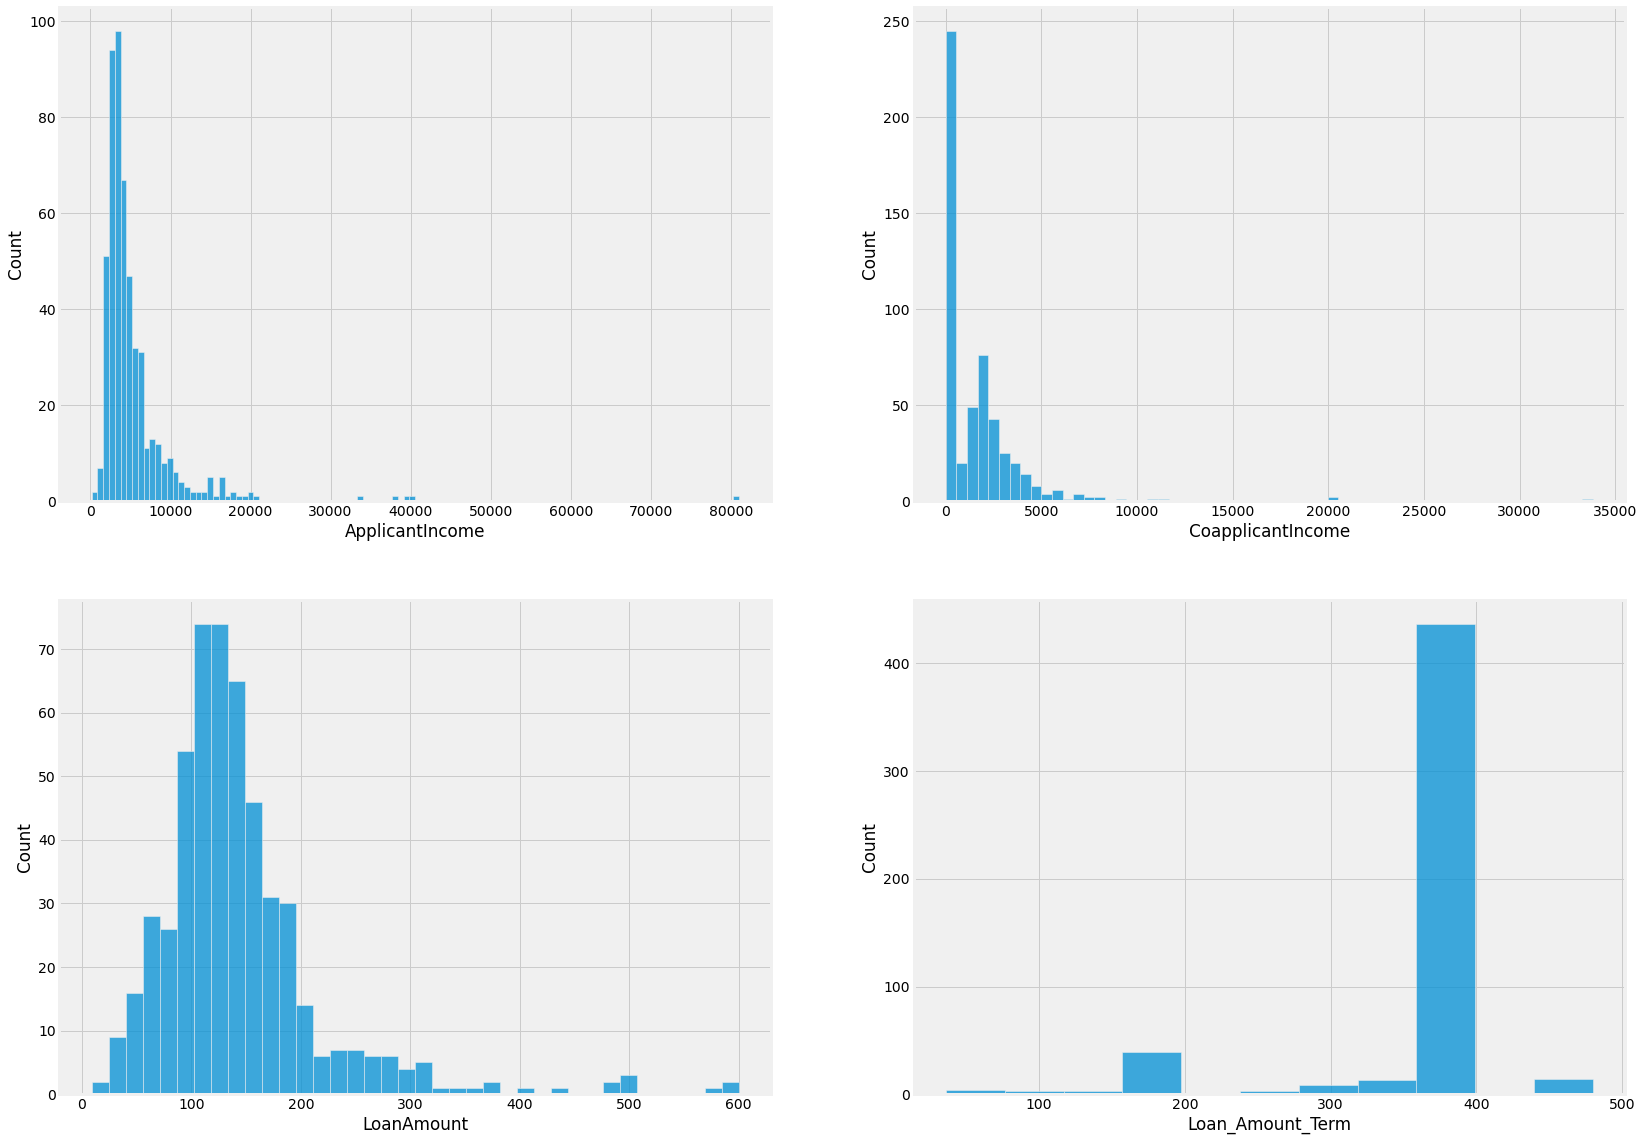

In [320]:
plt.figure(figsize = (25,20))

plt.subplot(2,2,1)
sns.histplot(data=final, x='ApplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(2,2,2)
sns.histplot(data=final, x='CoapplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(2,2,3)
sns.histplot(data=final, x='LoanAmount', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(2,2,4)
sns.histplot(data=final, x='Loan_Amount_Term', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)


<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Loan_Status'>

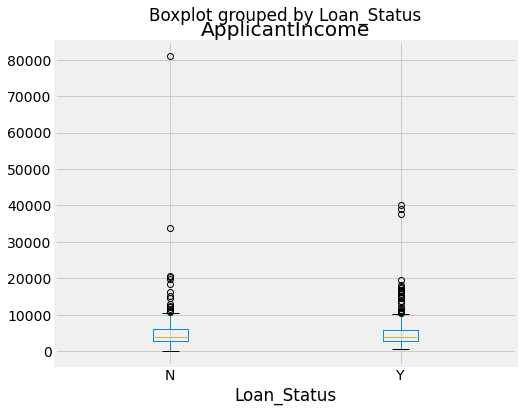

In [321]:
final.boxplot(column='ApplicantIncome', by='Loan_Status')

#### Treatment of Outliers

In [322]:
finaldescribe=final.ApplicantIncome.describe()
final.ApplicantIncome.describe()

count      525.000000
mean      5314.660805
std       5513.094653
min        150.000000
25%       2895.000000
50%       3858.000000
75%       5819.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [323]:
Q1 = finaldescribe['25%']
Q3 = finaldescribe['75%']

In [324]:
upper_whisker_point = Q3+(1.5*(Q3-Q1)) #above Q3 + 1.5 * IQR
upper_whisker_point
#this is too small of a value and will exclude too many

10205.0

In [325]:
#Elimindate outliers in this ApplicantIncome column 

final.drop(final[final['ApplicantIncome'] >= 30000].index, inplace = True)

In [326]:
#Elimindate outliers in this ApplicantIncome column 

final.drop(final[final['CoapplicantIncome'] >= 10000].index, inplace = True)

#### EDA by Loan Status

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

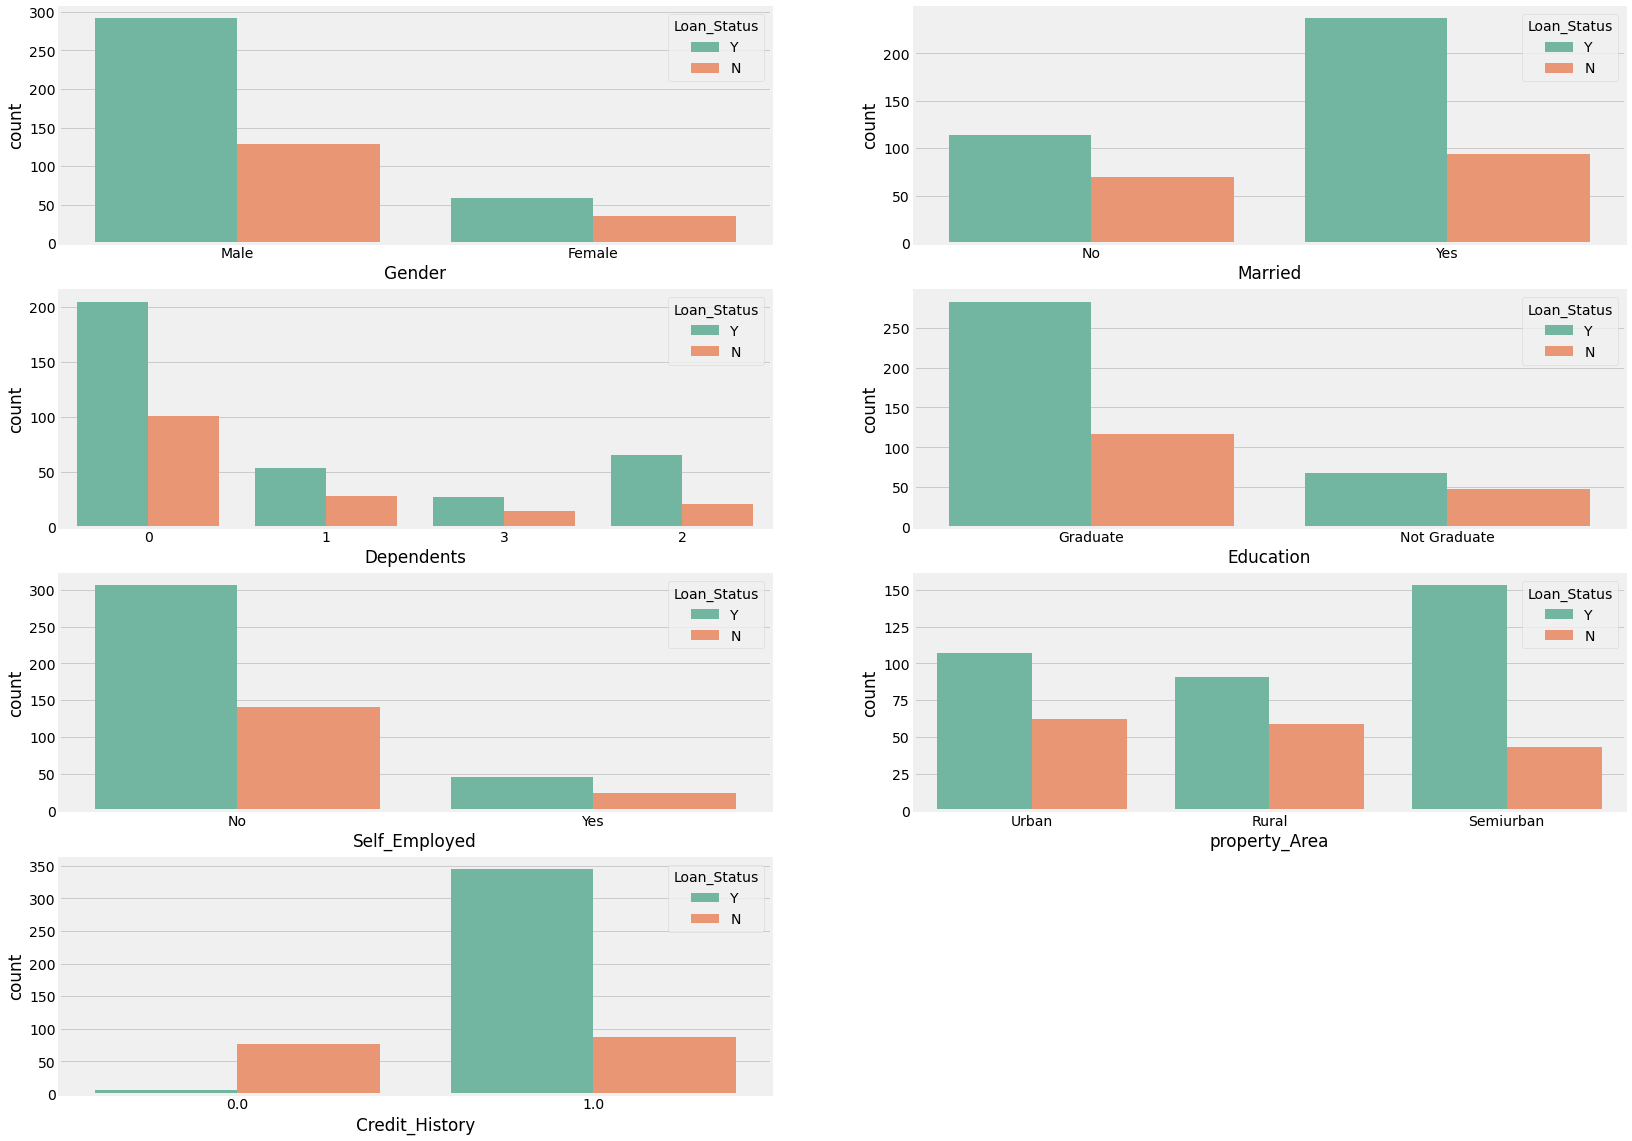

In [327]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender', hue = 'Loan_Status', palette = 'Set2', data = final)

plt.subplot(4,2,2)
sns.countplot(x = 'Married', hue = 'Loan_Status',palette = 'Set2', data = final)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', hue = 'Loan_Status', palette = 'Set2', data = final)

plt.subplot(4,2,4)
sns.countplot(x = 'Education', hue = 'Loan_Status', palette = 'Set2', data = final)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', palette = 'Set2', data = final)

plt.subplot(4,2,6)
sns.countplot(x = 'property_Area', hue = 'Loan_Status', palette = 'Set2', data = final)

plt.subplot(4,2,7)
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', palette = 'Set2', data = final)

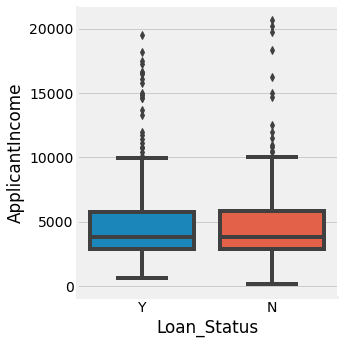

In [328]:
sns.catplot(x = 'Loan_Status', y="ApplicantIncome", kind="box", data = final)

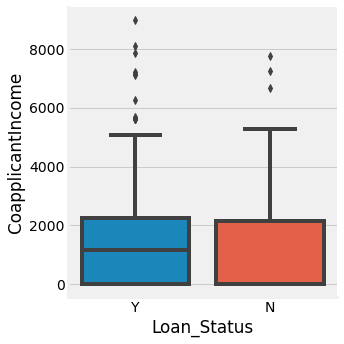

In [329]:
sns.catplot(x = 'Loan_Status', y="CoapplicantIncome", kind="box", data = final)

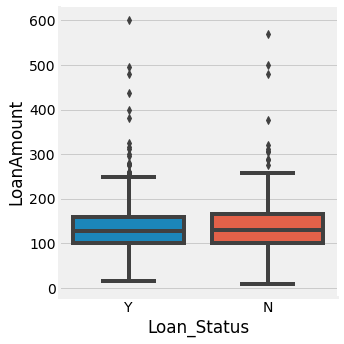

In [330]:
sns.catplot(x = 'Loan_Status', y="LoanAmount", kind="box", data = final)

In [331]:
#plt.figure(figsize = (30,20))
#sns.countplot(x='Loan_Tenor_years', hue = 'Loan_Status', data = final)

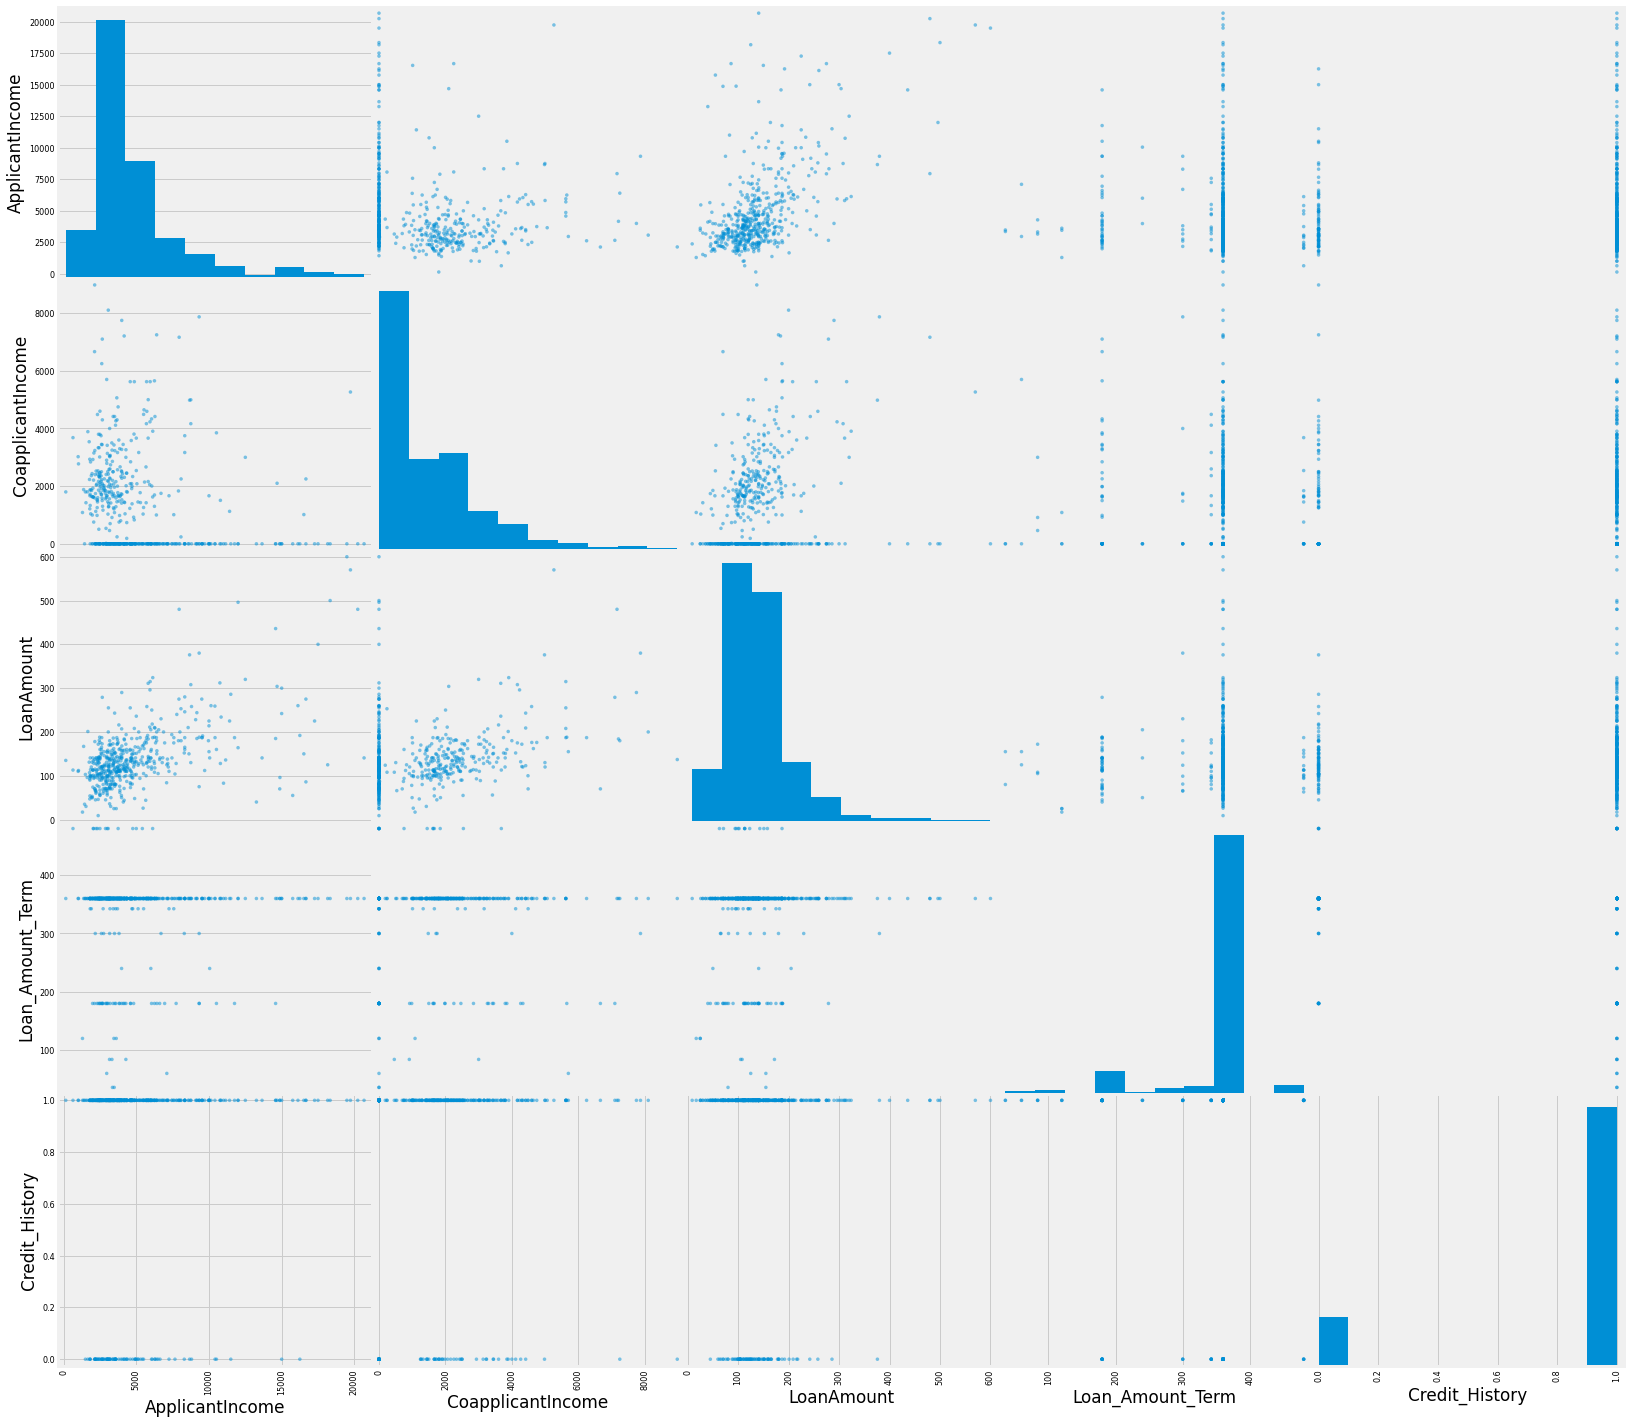

In [332]:
pd.plotting.scatter_matrix(final,figsize=(25,25), s=50);

In [333]:
final.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

#### Basic EDA Analysis 
- [Return to Contents](#Contents)

##### Observations
*  Generally, the applicants tend to be Male Graduates who are employed, seeking to make their purchase of a home and therefore need access to housing loans 
* Most of the applicants tend to be from the Semi-urban neighbourhood, implying that they tend to be at the middleclass income level 
* Majority of the customers tend to have no children or 1 child, implying that they are generally quite young, and are looking to taking out their first home loan 
* Most of the applicants who were assessed to be eligible for the loan have had good credit standing in the past 
* Applicants tend to have generally skewed income levels
* Co-applicants tend to have lesser income that the actual applicants
* Majority of the customers tend to have no children or 1 child
* Loan amount distribution follows a similar pattern to that of the Applicant income 
* The most common tenor to borrow the loan at is 360 months 

##### Classification of Eligible Customers

* Setting a new dataframe with only eligible customers for Loan (Loan_Status=Y)

- [Return to Contents](#Contents)

In [334]:
final.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.000000,0.0,140.741294,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,10785.235294,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.000000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.000000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.000000,0.0,141.000000,360.0,1.0,Urban,Y


In [335]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            515 non-null    object 
 1   Gender             515 non-null    object 
 2   Married            515 non-null    object 
 3   Dependents         515 non-null    object 
 4   Education          515 non-null    object 
 5   Self_Employed      515 non-null    object 
 6   ApplicantIncome    515 non-null    float64
 7   CoapplicantIncome  515 non-null    float64
 8   LoanAmount         515 non-null    float64
 9   Loan_Amount_Term   515 non-null    float64
 10  Credit_History     515 non-null    float64
 11  property_Area      515 non-null    object 
 12  Loan_Status        515 non-null    object 
dtypes: float64(5), object(8)
memory usage: 56.3+ KB


In [336]:
final_y=final[final['Loan_Status']=='Y']

In [337]:
final_y.drop('Loan_ID',axis=1,inplace=True)
final_y.drop('Loan_Status',axis=1,inplace=True)
#final_y.drop('Loan_Tenor_years',axis=1,inplace=True)

/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/909367719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y.drop('Loan_ID',axis=1,inplace=True)
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/909367719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y.drop('Loan_Status',axis=1,inplace=True)


In [338]:
final_y

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,140.741294,360.0,1.0,Urban
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban
6,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232.0,1950.0,108.000000,360.0,1.0,Rural
609,Female,No,0,Graduate,No,2900.0,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,3,Graduate,No,4106.0,0.0,40.000000,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.000000,360.0,1.0,Urban


In [339]:
#Transform Gender
final_y['Gender_num']=final_y['Gender']
final_y['Gender_num'].replace({'Male':'1'},inplace=True)
final_y['Gender_num'].replace({'Female':'0'},inplace=True)
final_y.head()

/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/1979027304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y['Gender_num']=final_y['Gender']
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/1979027304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y['Gender_num'].replace({'Male':'1'},inplace=True)
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/1979027304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Gender_num
0,Male,No,0,Graduate,No,5849.0,0.0,140.741294,360.0,1.0,Urban,1
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,1
6,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.000000,360.0,1.0,Urban,1


In [340]:
#Transforming Married
final_y['Married_num']=final_y['Married']
final_y['Married_num'].replace({'Yes':'1'},inplace=True)
final_y['Married_num'].replace({'No':'0'},inplace=True)
final_y.head()

/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/55121186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y['Married_num']=final_y['Married']
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/55121186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y['Married_num'].replace({'Yes':'1'},inplace=True)
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/55121186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Gender_num,Married_num
0,Male,No,0,Graduate,No,5849.0,0.0,140.741294,360.0,1.0,Urban,1,0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,1,1
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,1,1
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,1,0
6,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.000000,360.0,1.0,Urban,1,1


In [341]:
#Transforming Dependents (currently an object)
final_y['Dependents'] = pd.to_numeric(final_y['Dependents'])

/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/4259016239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y['Dependents'] = pd.to_numeric(final_y['Dependents'])


In [342]:
#Transforming Education (currently an object)
final_y['Education_num']=final_y['Education']
final_y['Education_num'].replace({'Graduate':'1'},inplace=True)
final_y['Education_num'].replace({'Not Graduate':'0'},inplace=True)
final_y.head()

/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/1640119859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y['Education_num']=final_y['Education']
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/1640119859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y['Education_num'].replace({'Graduate':'1'},inplace=True)
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/1640119859.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Gender_num,Married_num,Education_num
0,Male,No,0,Graduate,No,5849.0,0.0,140.741294,360.0,1.0,Urban,1,0,1
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,1,1,1
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,1,1,0
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,1,0,1
6,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.000000,360.0,1.0,Urban,1,1,0


In [343]:
#Transforming Self_Employed (currently an object)
final_y['Self_Employed_num']=final_y['Self_Employed']
final_y['Self_Employed_num'].replace({'Yes':'1'},inplace=True)
final_y['Self_Employed_num'].replace({'No':'0'},inplace=True)
final_y.head()

/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/753739099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y['Self_Employed_num']=final_y['Self_Employed']
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/753739099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y['Self_Employed_num'].replace({'Yes':'1'},inplace=True)
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/753739099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Gender_num,Married_num,Education_num,Self_Employed_num
0,Male,No,0,Graduate,No,5849.0,0.0,140.741294,360.0,1.0,Urban,1,0,1,0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,1,1,1,1
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,1,1,0,0
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,1,0,1,0
6,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.000000,360.0,1.0,Urban,1,1,0,0


In [344]:
#Transforming property_Area (currently an object)
final_y['property_Area_num']=final_y['property_Area']
final_y['property_Area_num'].replace({'Semiurban':'1'},inplace=True)
final_y['property_Area_num'].replace({'Rural':'0'},inplace=True)
final_y['property_Area_num'].replace({'Urban':'2'},inplace=True)

/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/234081958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y['property_Area_num']=final_y['property_Area']
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/234081958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y['property_Area_num'].replace({'Semiurban':'1'},inplace=True)
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/234081958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

In [345]:
#Drop Categorical variables 
final_y.drop('Gender', axis = 1,inplace=True)
final_y.drop('Married', axis = 1,inplace=True)
final_y.drop('Education', axis = 1,inplace=True)
final_y.drop('Self_Employed', axis = 1,inplace=True)
final_y.drop('property_Area', axis = 1,inplace=True)

/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/794287802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y.drop('Gender', axis = 1,inplace=True)
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/794287802.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_y.drop('Married', axis = 1,inplace=True)
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/794287802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [346]:
final_y = final_y.astype({'Dependents':'float','Gender_num':'float','Married_num':'float','Education_num':'float','Self_Employed_num':'float','property_Area_num':'float'})

final_y.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 612
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         351 non-null    float64
 1   ApplicantIncome    351 non-null    float64
 2   CoapplicantIncome  351 non-null    float64
 3   LoanAmount         351 non-null    float64
 4   Loan_Amount_Term   351 non-null    float64
 5   Credit_History     351 non-null    float64
 6   Gender_num         351 non-null    float64
 7   Married_num        351 non-null    float64
 8   Education_num      351 non-null    float64
 9   Self_Employed_num  351 non-null    float64
 10  property_Area_num  351 non-null    float64
dtypes: float64(11)
memory usage: 32.9 KB


In [347]:
final_y.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num
0,0.0,5849.0,0.0,140.741294,360.0,1.0,1.0,0.0,1.0,0.0,2.0
2,0.0,3000.0,0.0,66.000000,360.0,1.0,1.0,1.0,1.0,1.0,2.0
3,0.0,2583.0,2358.0,120.000000,360.0,1.0,1.0,1.0,0.0,0.0,2.0
4,0.0,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,1.0,0.0,2.0
6,0.0,2333.0,1516.0,95.000000,360.0,1.0,1.0,1.0,0.0,0.0,2.0


In [348]:
X_class=final_y

##### K-means Clustering

In [349]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
km = KMeans(n_clusters=3, random_state=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_class)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=1)

In [350]:
X_class['cluster'] = km.labels_
X_class.sort_values('cluster')

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num,cluster
612,2.0,7583.0,0.0,187.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0,0
266,2.0,4708.0,1387.0,150.0,360.0,1.0,1.0,1.0,1.0,0.0,1.0,0
267,3.0,4333.0,1811.0,160.0,360.0,0.0,1.0,1.0,1.0,0.0,2.0,0
520,2.0,2192.0,1742.0,45.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,0
516,2.0,2031.0,1632.0,113.0,480.0,1.0,0.0,1.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.0,4000.0,2500.0,140.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,2
306,0.0,3762.0,1666.0,135.0,360.0,1.0,0.0,0.0,1.0,0.0,0.0,2
310,0.0,2917.0,0.0,84.0,360.0,1.0,0.0,0.0,1.0,0.0,1.0,2
272,0.0,2833.0,1857.0,126.0,360.0,1.0,1.0,0.0,1.0,0.0,0.0,2


In [351]:
X_class.groupby('cluster').mean()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num
cluster,,,,,,,,,,,
0,0.994819,3863.378238,1909.113575,132.251025,336.568672,0.984456,0.979275,0.979275,0.787565,0.067358,1.093264
1,1.183673,10741.061224,579.795918,215.377196,337.959184,1.000000,0.816327,0.795918,0.897959,0.571429,0.959184
2,0.137615,4049.657683,934.623853,115.983705,354.562525,0.972477,0.577982,0.082569,0.798165,0.036697,1.000000


In [352]:
X_index = X_class.groupby('cluster').mean()
cluster = list(X_index.index.values)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

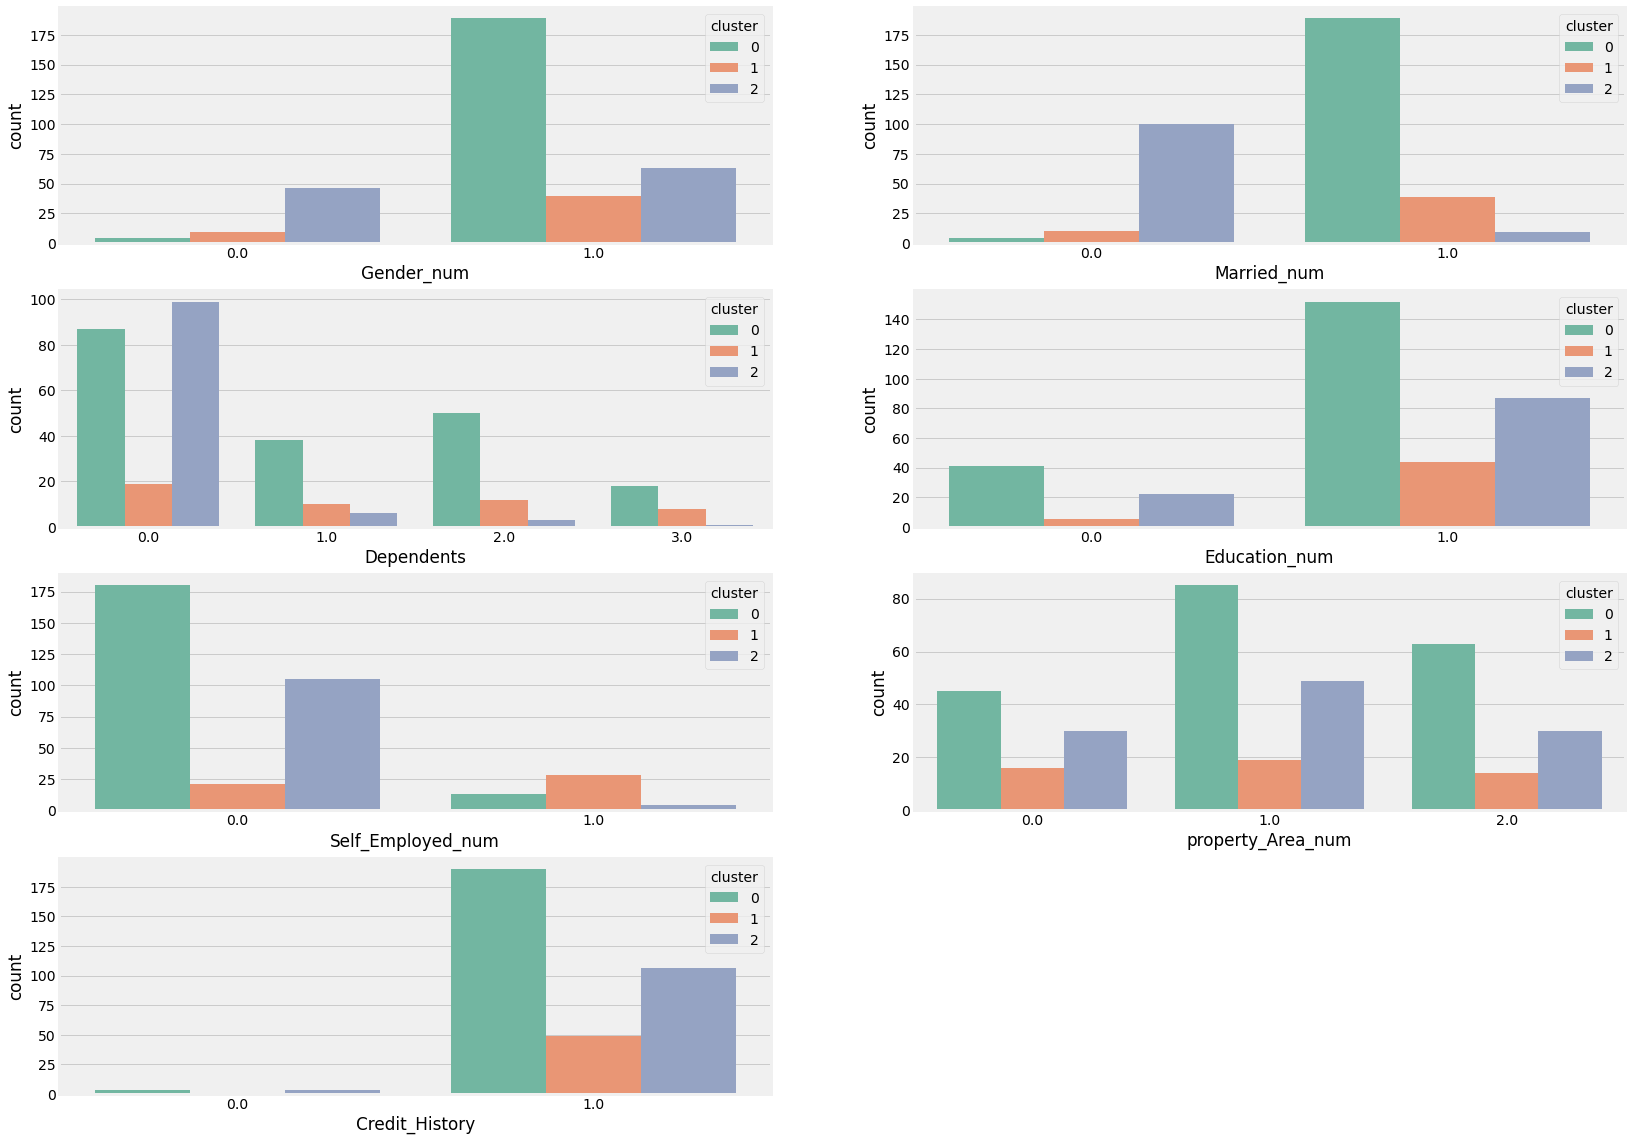

In [353]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender_num', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,2)
sns.countplot(x = 'Married_num', hue = 'cluster',palette = 'Set2', data = X_class)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,4)
sns.countplot(x = 'Education_num', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed_num', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,6)
sns.countplot(x = 'property_Area_num', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,7)
sns.countplot(x = 'Credit_History', hue = 'cluster', palette = 'Set2', data = X_class)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

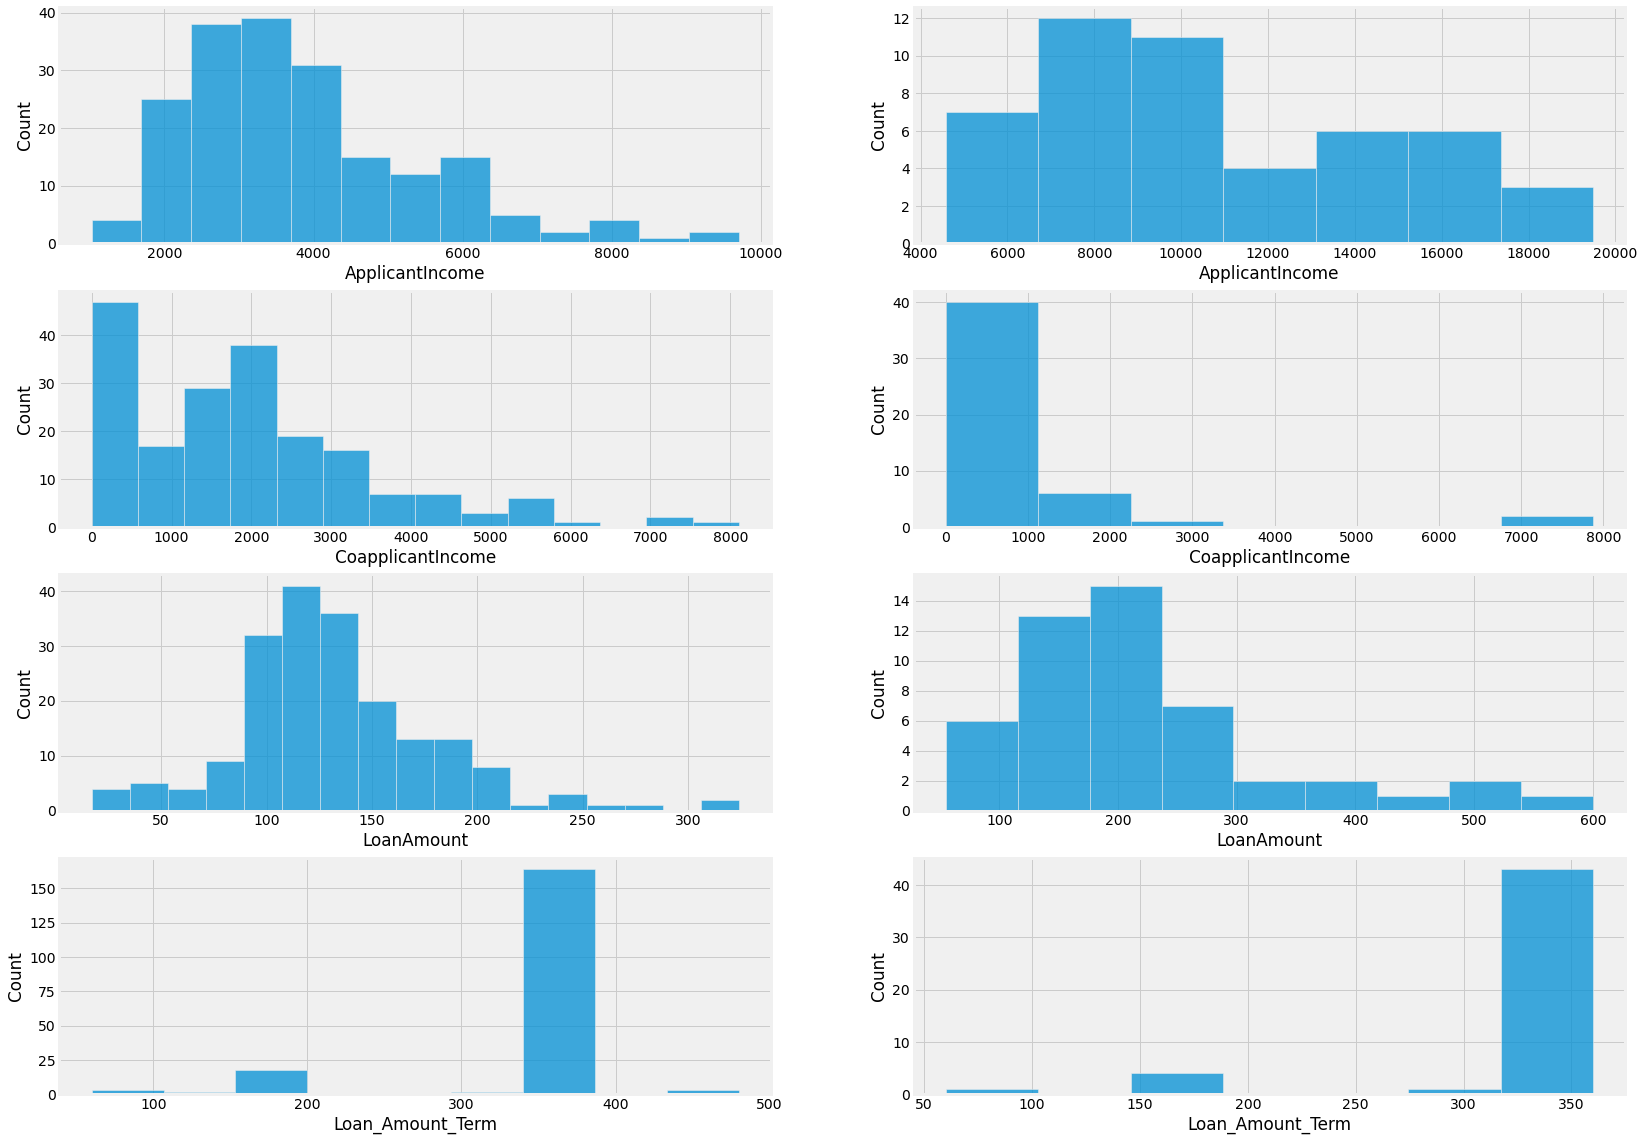

In [354]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.histplot(data=X_class[X_class['cluster']==0], x='ApplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,2,3)
sns.histplot(data=X_class[X_class['cluster']==0], x='CoapplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,2,5)
sns.histplot(data=X_class[X_class['cluster']==0], x='LoanAmount', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,2,7)
sns.histplot(data=X_class[X_class['cluster']==0], x='Loan_Amount_Term', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,2,2)
sns.histplot(data=X_class[X_class['cluster']==1], x='ApplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,2,4)
sns.histplot(data=X_class[X_class['cluster']==1], x='CoapplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,2,6)
sns.histplot(data=X_class[X_class['cluster']==1], x='LoanAmount', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,2,8)
sns.histplot(data=X_class[X_class['cluster']==1], x='Loan_Amount_Term', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)



In [355]:
metrics.silhouette_score(X_scaled, km.labels_, metric='euclidean')

0.16021324057226474

##### DBSCAN Clustering

In [356]:
#DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=5, min_samples=3)
db.fit(X_scaled)

DBSCAN(eps=5, min_samples=3)

In [357]:
X_class['cluster'] = db.labels_
X_class.sort_values('cluster')

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num,cluster
122,0.0,2137.0,8980.0,137.000000,360.0,0.0,0.0,0.0,1.0,0.0,1.0,-1
0,0.0,5849.0,0.0,140.741294,360.0,1.0,1.0,0.0,1.0,0.0,2.0,0
415,0.0,2995.0,0.0,60.000000,360.0,1.0,0.0,0.0,1.0,0.0,2.0,0
413,0.0,2253.0,2033.0,110.000000,360.0,1.0,1.0,1.0,0.0,0.0,0.0,0
407,0.0,2213.0,0.0,66.000000,360.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
326,0.0,4917.0,0.0,130.000000,360.0,0.0,1.0,0.0,1.0,0.0,0.0,1
267,3.0,4333.0,1811.0,160.000000,360.0,0.0,1.0,1.0,1.0,0.0,2.0,1
527,1.0,5285.0,1430.0,161.000000,360.0,0.0,1.0,1.0,0.0,0.0,1.0,1
201,2.0,4923.0,0.0,166.000000,360.0,0.0,1.0,0.0,1.0,0.0,1.0,1


In [358]:
X_class.groupby('cluster').mean()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num
cluster,,,,,,,,,,,
-1,0.000000,2137.000000,8980.000000,137.000000,360.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000
0,0.750725,4896.459964,1403.060638,138.771462,342.565417,1.0,0.831884,0.678261,0.805797,0.130435,1.049275
1,1.200000,4388.200000,1141.400000,141.400000,324.000000,0.0,1.000000,0.600000,0.800000,0.000000,0.800000


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

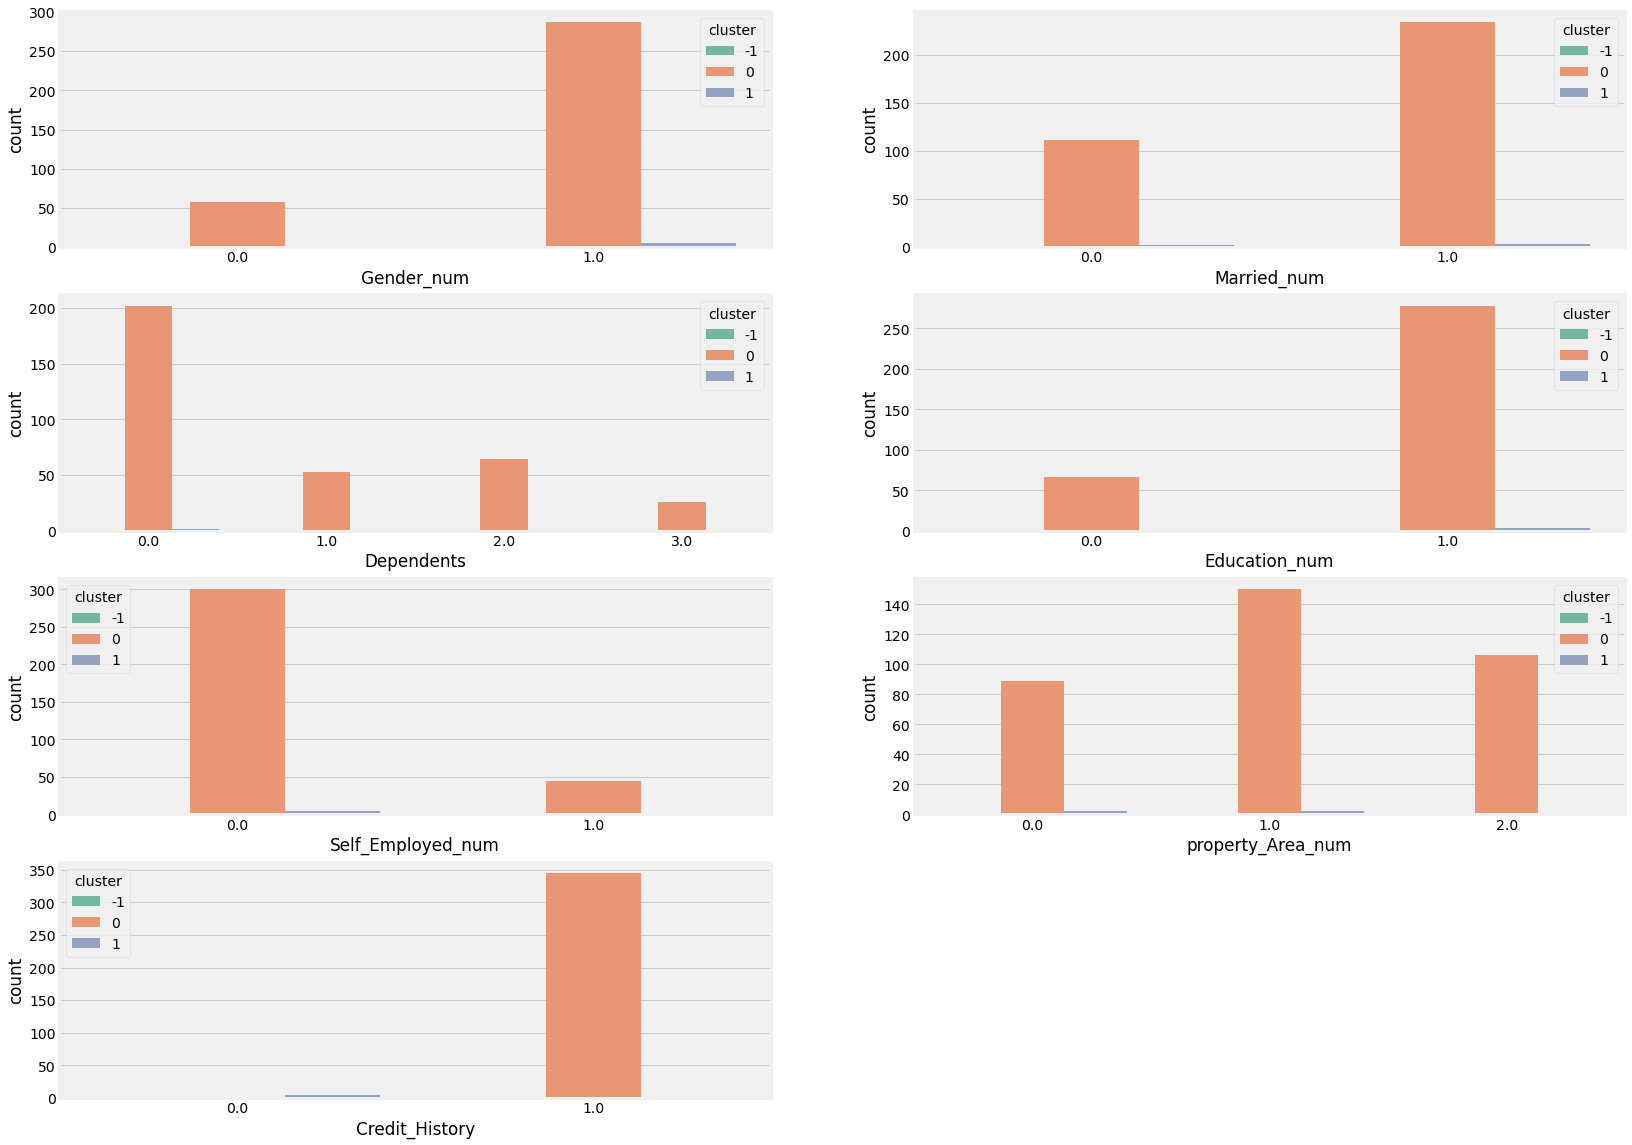

In [359]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender_num', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,2)
sns.countplot(x = 'Married_num', hue = 'cluster',palette = 'Set2', data = X_class)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,4)
sns.countplot(x = 'Education_num', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed_num', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,6)
sns.countplot(x = 'property_Area_num', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,7)
sns.countplot(x = 'Credit_History', hue = 'cluster', palette = 'Set2', data = X_class)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

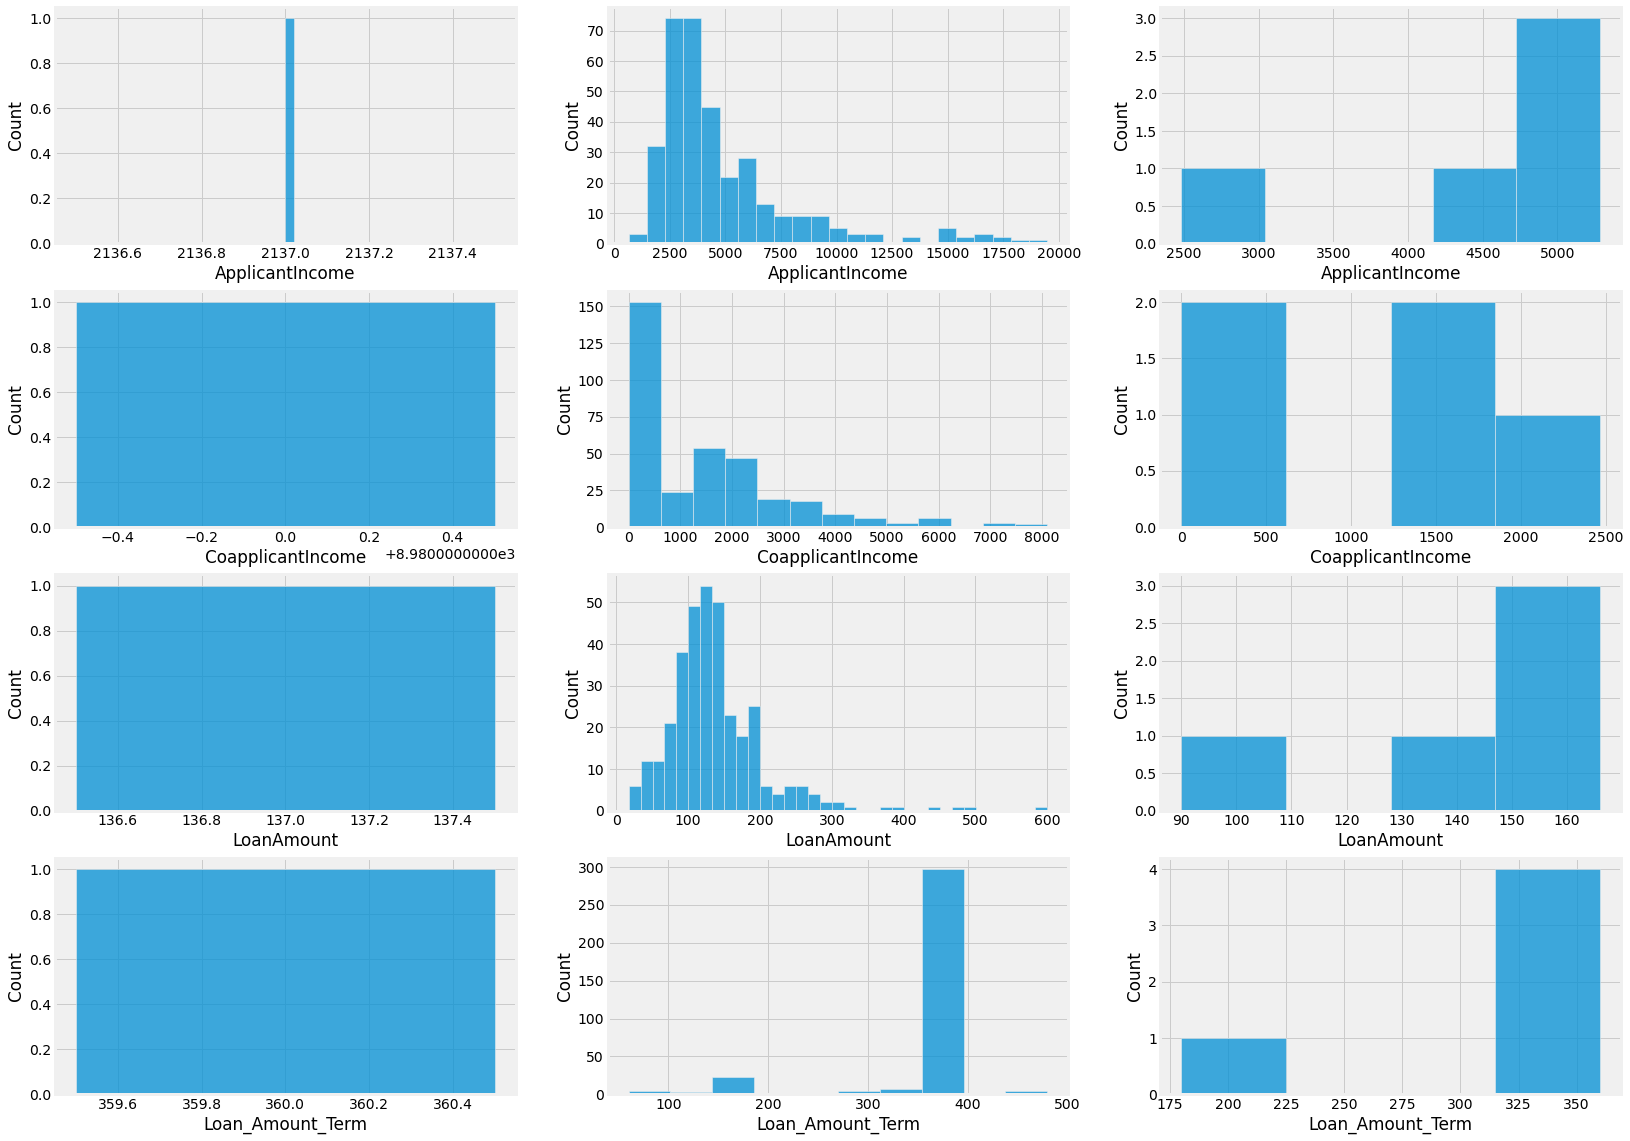

In [360]:
plt.figure(figsize = (25,20))

plt.subplot(4,3,1)
sns.histplot(data=X_class[X_class['cluster']==-1], x='ApplicantIncome', bins=50, cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,4)
sns.histplot(data=X_class[X_class['cluster']==-1], x='CoapplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,7)
sns.histplot(data=X_class[X_class['cluster']==-1], x='LoanAmount', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,10)
sns.histplot(data=X_class[X_class['cluster']==-1], x='Loan_Amount_Term', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,2)
sns.histplot(data=X_class[X_class['cluster']==0], x='ApplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,5)
sns.histplot(data=X_class[X_class['cluster']==0], x='CoapplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,8)
sns.histplot(data=X_class[X_class['cluster']==0], x='LoanAmount', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,11)
sns.histplot(data=X_class[X_class['cluster']==0], x='Loan_Amount_Term', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,3)
sns.histplot(data=X_class[X_class['cluster']==1], x='ApplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,6)
sns.histplot(data=X_class[X_class['cluster']==1], x='CoapplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,9)
sns.histplot(data=X_class[X_class['cluster']==1], x='LoanAmount', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,12)
sns.histplot(data=X_class[X_class['cluster']==1], x='Loan_Amount_Term', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)



In [361]:
metrics.silhouette_score(X_scaled, db.labels_, metric='euclidean')

0.5134578359053243

###### Heirarchical Clustering

In [362]:
#Heirarchical Clustering
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_scaled)
labels = agg.labels_

In [363]:
X_class['cluster'] = agg.labels_
X_class.sort_values('cluster')

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num,cluster
0,0.0,5849.0,0.0,140.741294,360.0,1.0,1.0,0.0,1.0,0.0,2.0,0
394,2.0,3100.0,1400.0,113.000000,360.0,1.0,1.0,1.0,1.0,0.0,2.0,0
393,2.0,1993.0,1625.0,113.000000,180.0,1.0,1.0,1.0,0.0,0.0,1.0,0
391,3.0,9504.0,0.0,275.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0
390,3.0,9167.0,0.0,185.000000,360.0,1.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
527,1.0,5285.0,1430.0,161.000000,360.0,0.0,1.0,1.0,0.0,0.0,1.0,2
267,3.0,4333.0,1811.0,160.000000,360.0,0.0,1.0,1.0,1.0,0.0,2.0,2
326,0.0,4917.0,0.0,130.000000,360.0,0.0,1.0,0.0,1.0,0.0,0.0,2
453,0.0,2483.0,2466.0,90.000000,180.0,0.0,1.0,1.0,1.0,0.0,0.0,2


In [364]:
X_class.groupby('cluster').mean()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num
cluster,,,,,,,,,,,
0,0.844068,4876.510805,1539.742102,143.530213,338.915905,1.0,0.972881,0.752542,0.803390,0.135593,1.040678
1,0.200000,5014.160000,596.640000,110.694826,364.097537,1.0,0.000000,0.240000,0.820000,0.100000,1.100000
2,1.000000,4013.000000,2447.833333,140.666667,330.000000,0.0,0.833333,0.500000,0.833333,0.000000,0.833333


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

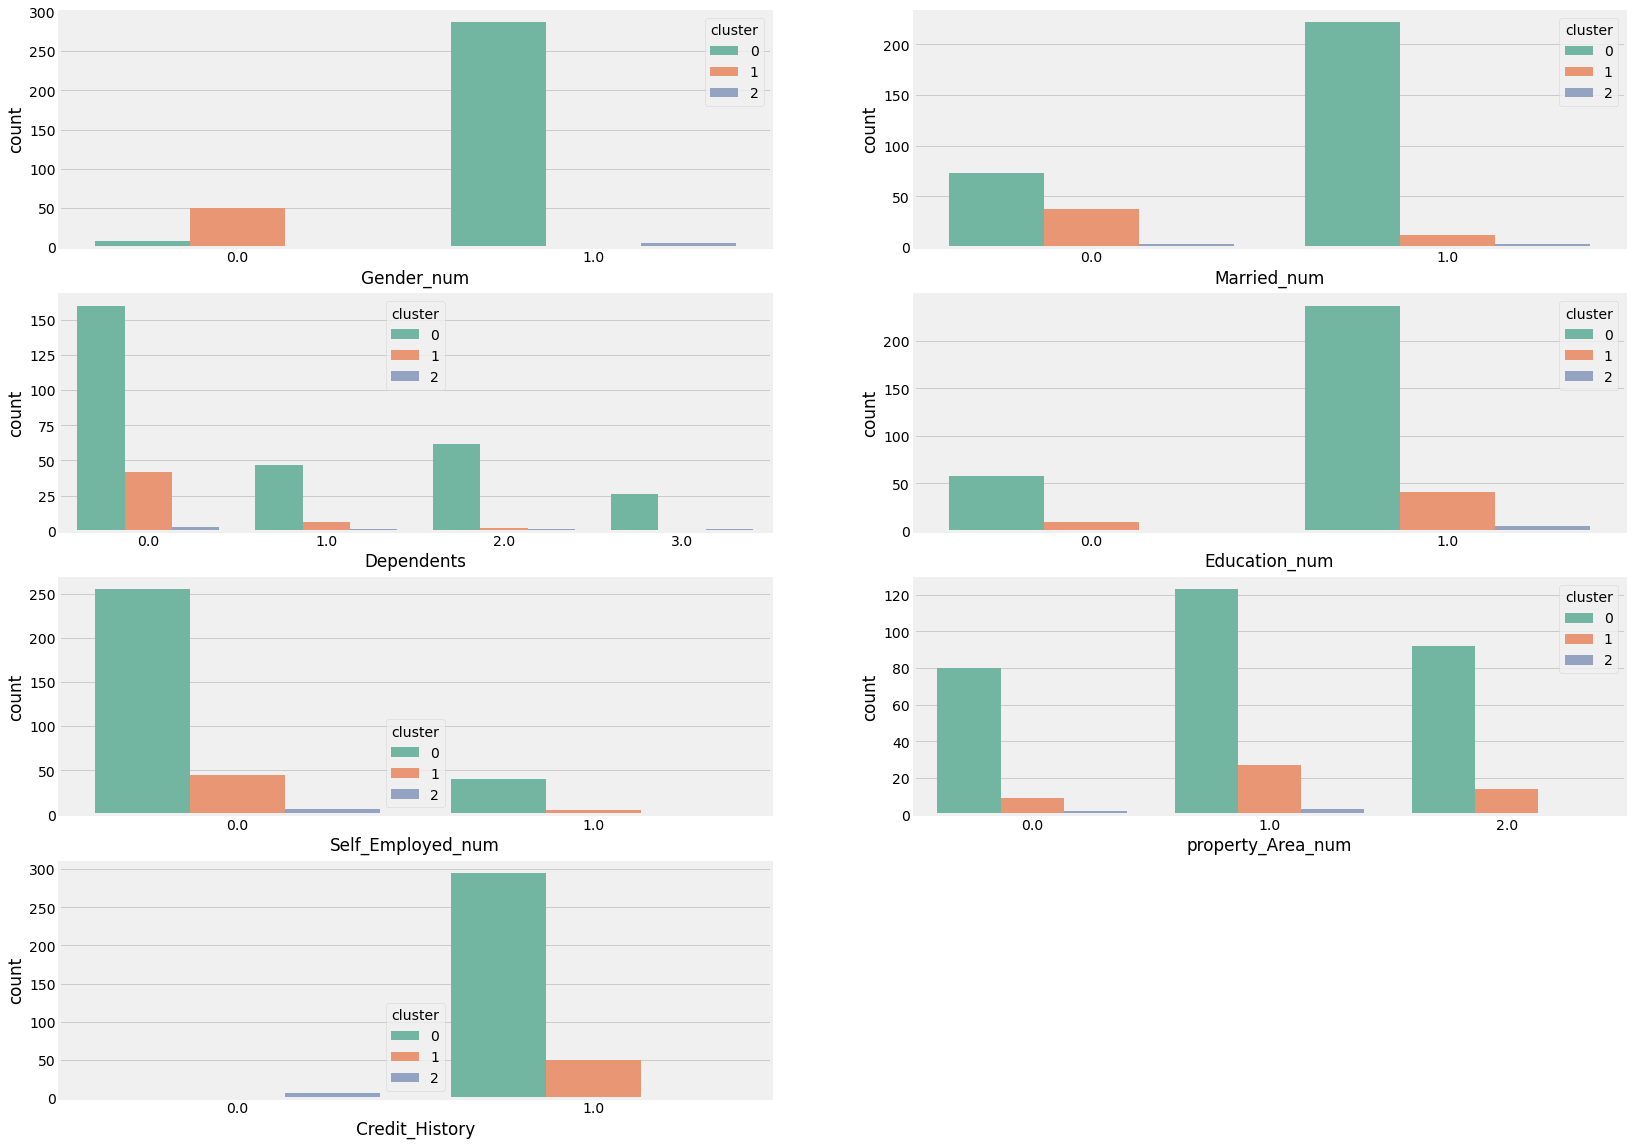

In [365]:
plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender_num', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,2)
sns.countplot(x = 'Married_num', hue = 'cluster',palette = 'Set2', data = X_class)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,4)
sns.countplot(x = 'Education_num', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed_num', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,6)
sns.countplot(x = 'property_Area_num', hue = 'cluster', palette = 'Set2', data = X_class)

plt.subplot(4,2,7)
sns.countplot(x = 'Credit_History', hue = 'cluster', palette = 'Set2', data = X_class)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

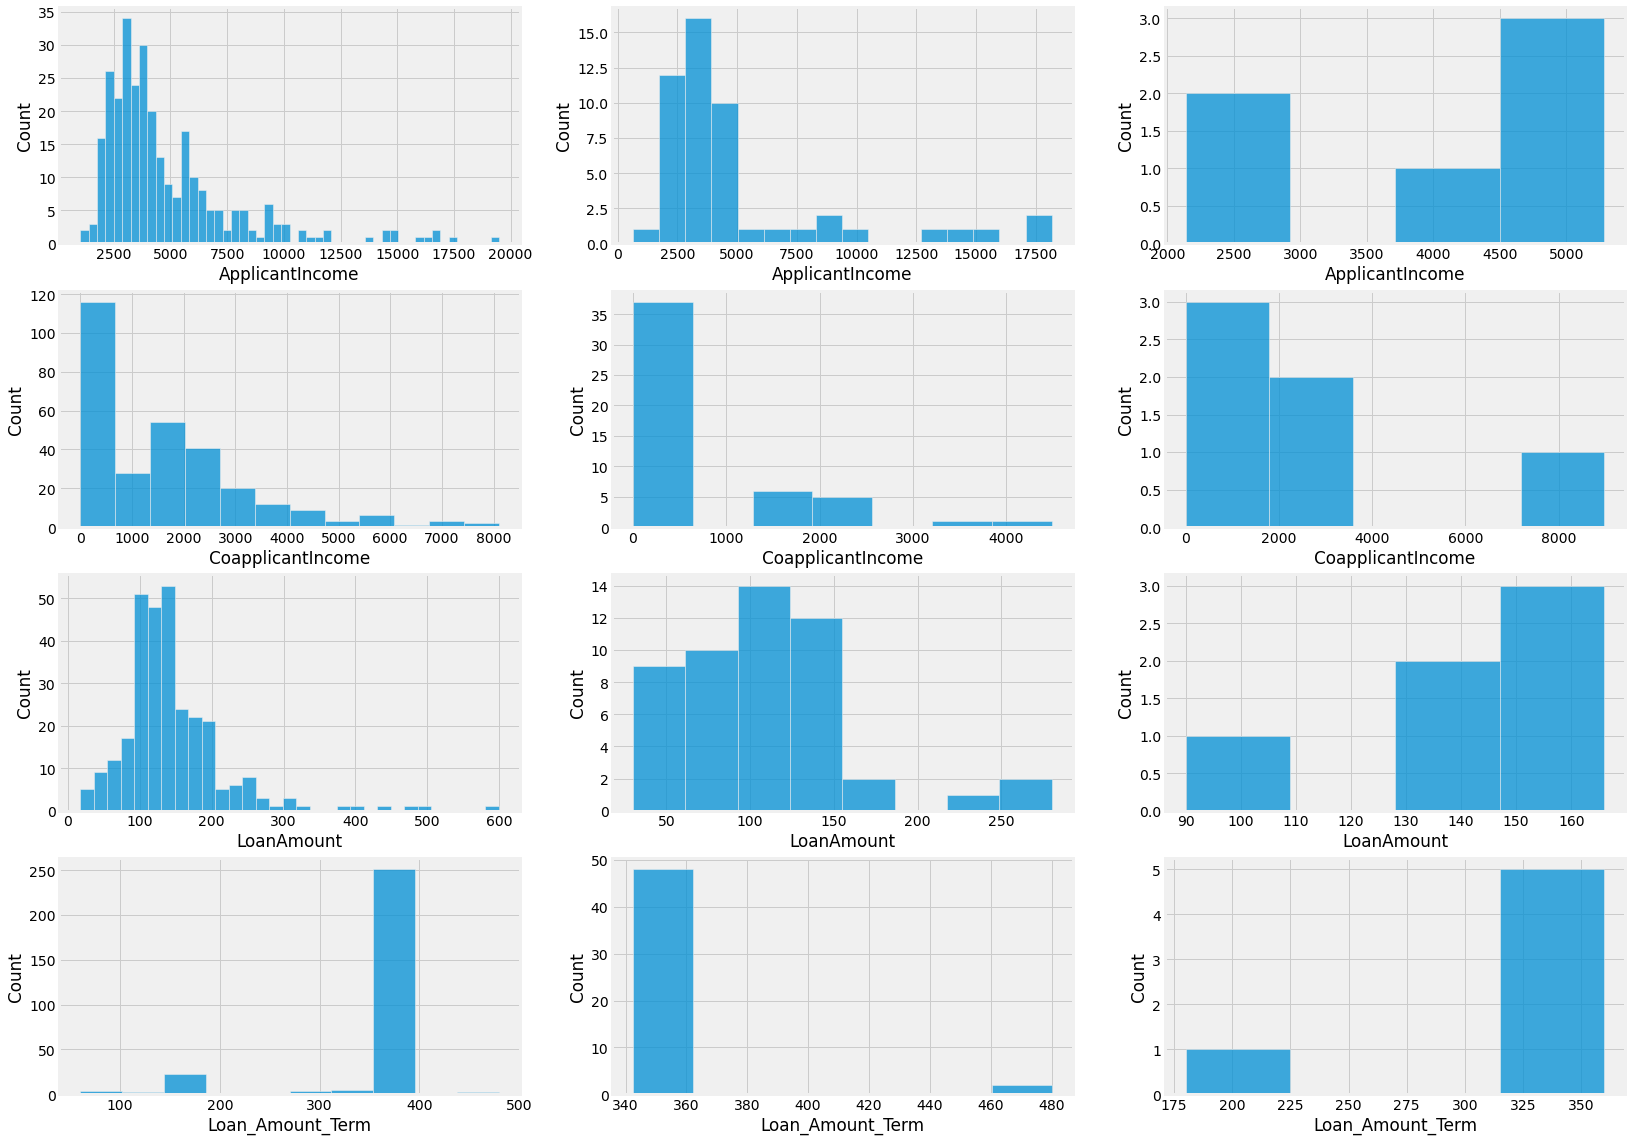

In [366]:
plt.figure(figsize = (25,20))

plt.subplot(4,3,1)
sns.histplot(data=X_class[X_class['cluster']==0], x='ApplicantIncome', bins=50, cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,4)
sns.histplot(data=X_class[X_class['cluster']==0], x='CoapplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,7)
sns.histplot(data=X_class[X_class['cluster']==0], x='LoanAmount', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,10)
sns.histplot(data=X_class[X_class['cluster']==0], x='Loan_Amount_Term', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,2)
sns.histplot(data=X_class[X_class['cluster']==1], x='ApplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,5)
sns.histplot(data=X_class[X_class['cluster']==1], x='CoapplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,8)
sns.histplot(data=X_class[X_class['cluster']==1], x='LoanAmount', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,11)
sns.histplot(data=X_class[X_class['cluster']==1], x='Loan_Amount_Term', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,3)
sns.histplot(data=X_class[X_class['cluster']==2], x='ApplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,6)
sns.histplot(data=X_class[X_class['cluster']==2], x='CoapplicantIncome', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,9)
sns.histplot(data=X_class[X_class['cluster']==2], x='LoanAmount', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)

plt.subplot(4,3,12)
sns.histplot(data=X_class[X_class['cluster']==2], x='Loan_Amount_Term', bins='auto', cumulative=False, element='bars', fill=True, palette='rocket', legend=True)



In [367]:
metrics.silhouette_score(X_scaled, agg.labels_, metric='euclidean')

0.1877766516061862

#### Conclusion for EDA
- [Return to Contents](#Contents)

##### Conclusion on Customer Segmentation

There are 3 main clusters on this dataset
* Category 1: Bad credit history, co-applicant who earns high levels of income, with avg of only 1 child 
* Category 2: Good credit history, medium co-applicant income, no children 
* Category 3: Good credit history, high co-applicant income, 0-1 children 

## Part 3: *Modelling*

- [Return to Contents](#Contents)


#### Step 1: Prepping variables for model

##### Setting Variables (Target and Features)

In [368]:
#drop Loan ID as it is not necessary for this model 
final = final.drop('Loan_ID', axis = 1)

In [369]:
y = final['Loan_Status']

feature_cols = final.columns.drop(['Loan_Status']) #Loan_Status is Y variable 

In [370]:
X = final[feature_cols]

In [371]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             515 non-null    object 
 1   Married            515 non-null    object 
 2   Dependents         515 non-null    object 
 3   Education          515 non-null    object 
 4   Self_Employed      515 non-null    object 
 5   ApplicantIncome    515 non-null    float64
 6   CoapplicantIncome  515 non-null    float64
 7   LoanAmount         515 non-null    float64
 8   Loan_Amount_Term   515 non-null    float64
 9   Credit_History     515 non-null    float64
 10  property_Area      515 non-null    object 
dtypes: float64(5), object(6)
memory usage: 48.3+ KB


##### Converting categorical variables to numerical variables

In [372]:
#Transforming Gender
print(final['Gender'].value_counts())
X['Gender_num']=X['Gender']
X['Gender_num'].replace({'Male':'1'},inplace=True)
X['Gender_num'].replace({'Female':'0'},inplace=True)
X.drop('Gender', axis = 1,inplace=True)
X.head()


Male      421
Female     94
Name: Gender, dtype: int64


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Gender_num
0,No,0,Graduate,No,5849.000000,0.0,140.741294,360.0,1.0,Urban,1
1,Yes,1,Graduate,No,10785.235294,1508.0,128.000000,360.0,1.0,Rural,1
2,Yes,0,Graduate,Yes,3000.000000,0.0,66.000000,360.0,1.0,Urban,1
3,Yes,0,Not Graduate,No,2583.000000,2358.0,120.000000,360.0,1.0,Urban,1
4,No,0,Graduate,No,6000.000000,0.0,141.000000,360.0,1.0,Urban,1


In [373]:
print(final['Married'].value_counts())

Yes    331
No     184
Name: Married, dtype: int64


In [374]:
#Transforming Married
X['Married_num']=X['Married']
X['Married_num'].replace({'Yes':'1'},inplace=True)
X['Married_num'].replace({'No':'0'},inplace=True)
X.drop('Married', axis = 1,inplace=True)
X.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Gender_num,Married_num
0,0,Graduate,No,5849.000000,0.0,140.741294,360.0,1.0,Urban,1,0
1,1,Graduate,No,10785.235294,1508.0,128.000000,360.0,1.0,Rural,1,1
2,0,Graduate,Yes,3000.000000,0.0,66.000000,360.0,1.0,Urban,1,1
3,0,Not Graduate,No,2583.000000,2358.0,120.000000,360.0,1.0,Urban,1,1
4,0,Graduate,No,6000.000000,0.0,141.000000,360.0,1.0,Urban,1,0


In [375]:
#Transforming Dependents (currently an object)
X['Dependents'] = pd.to_numeric(X['Dependents'])
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         515 non-null    int64  
 1   Education          515 non-null    object 
 2   Self_Employed      515 non-null    object 
 3   ApplicantIncome    515 non-null    float64
 4   CoapplicantIncome  515 non-null    float64
 5   LoanAmount         515 non-null    float64
 6   Loan_Amount_Term   515 non-null    float64
 7   Credit_History     515 non-null    float64
 8   property_Area      515 non-null    object 
 9   Gender_num         515 non-null    object 
 10  Married_num        515 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 48.3+ KB
None


In [376]:
print(final['Education'].value_counts())

Graduate        400
Not Graduate    115
Name: Education, dtype: int64


In [377]:
#Transforming Education (currently an object)
X['Education_num']=X['Education']
X['Education_num'].replace({'Graduate':'1'},inplace=True)
X['Education_num'].replace({'Not Graduate':'0'},inplace=True)
X.drop('Education', axis = 1,inplace=True)
X.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Gender_num,Married_num,Education_num
0,0,No,5849.000000,0.0,140.741294,360.0,1.0,Urban,1,0,1
1,1,No,10785.235294,1508.0,128.000000,360.0,1.0,Rural,1,1,1
2,0,Yes,3000.000000,0.0,66.000000,360.0,1.0,Urban,1,1,1
3,0,No,2583.000000,2358.0,120.000000,360.0,1.0,Urban,1,1,0
4,0,No,6000.000000,0.0,141.000000,360.0,1.0,Urban,1,0,1


In [378]:
print(final['Self_Employed'].value_counts())

No     446
Yes     69
Name: Self_Employed, dtype: int64


In [379]:
#Transforming Self_Employed (currently an object)
X['Self_Employed_num']=X['Self_Employed']
X['Self_Employed_num'].replace({'Yes':'1'},inplace=True)
X['Self_Employed_num'].replace({'No':'0'},inplace=True)
X.drop('Self_Employed', axis = 1,inplace=True)
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Gender_num,Married_num,Education_num,Self_Employed_num
0,0,5849.000000,0.0,140.741294,360.0,1.0,Urban,1,0,1,0
1,1,10785.235294,1508.0,128.000000,360.0,1.0,Rural,1,1,1,0
2,0,3000.000000,0.0,66.000000,360.0,1.0,Urban,1,1,1,1
3,0,2583.000000,2358.0,120.000000,360.0,1.0,Urban,1,1,0,0
4,0,6000.000000,0.0,141.000000,360.0,1.0,Urban,1,0,1,0


In [380]:
print(final['property_Area'].value_counts())

Semiurban    196
Urban        169
Rural        150
Name: property_Area, dtype: int64


In [381]:
#Transforming property_Area (currently an object)
X['property_Area_num']=X['property_Area']
X['property_Area_num'].replace({'Semiurban':'1'},inplace=True)
X['property_Area_num'].replace({'Rural':'0'},inplace=True)
X['property_Area_num'].replace({'Urban':'2'},inplace=True)
X.drop('property_Area', axis = 1,inplace=True)
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num
0,0,5849.000000,0.0,140.741294,360.0,1.0,1,0,1,0,2
1,1,10785.235294,1508.0,128.000000,360.0,1.0,1,1,1,0,0
2,0,3000.000000,0.0,66.000000,360.0,1.0,1,1,1,1,2
3,0,2583.000000,2358.0,120.000000,360.0,1.0,1,1,0,0,2
4,0,6000.000000,0.0,141.000000,360.0,1.0,1,0,1,0,2


In [382]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         515 non-null    int64  
 1   ApplicantIncome    515 non-null    float64
 2   CoapplicantIncome  515 non-null    float64
 3   LoanAmount         515 non-null    float64
 4   Loan_Amount_Term   515 non-null    float64
 5   Credit_History     515 non-null    float64
 6   Gender_num         515 non-null    object 
 7   Married_num        515 non-null    object 
 8   Education_num      515 non-null    object 
 9   Self_Employed_num  515 non-null    object 
 10  property_Area_num  515 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 48.3+ KB


In [383]:
X = X.astype({'Dependents':'float','Gender_num':'float','Married_num':'float','Education_num':'float','Self_Employed_num':'float','property_Area_num':'float'})


In [384]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         515 non-null    float64
 1   ApplicantIncome    515 non-null    float64
 2   CoapplicantIncome  515 non-null    float64
 3   LoanAmount         515 non-null    float64
 4   Loan_Amount_Term   515 non-null    float64
 5   Credit_History     515 non-null    float64
 6   Gender_num         515 non-null    float64
 7   Married_num        515 non-null    float64
 8   Education_num      515 non-null    float64
 9   Self_Employed_num  515 non-null    float64
 10  property_Area_num  515 non-null    float64
dtypes: float64(11)
memory usage: 48.3 KB


In [385]:
#Transform Loan_Status 
y.replace({'Y':1},inplace=True)
y.replace({'N':0},inplace=True)

#### Checking for multicollinearity and importance of features

<AxesSubplot:>

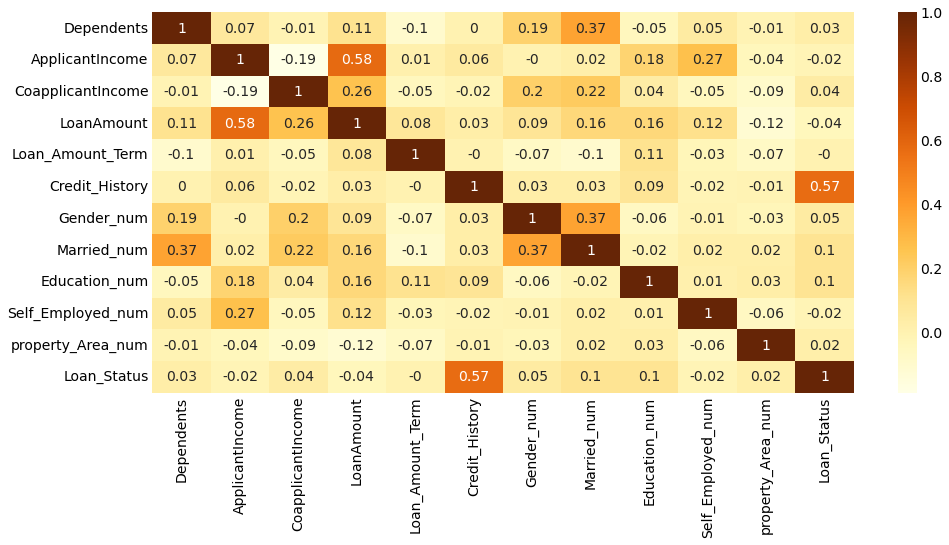

In [386]:
final_with_y=pd.concat([X, y], axis=1)
#correlation1 = final_with_y.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(final_with_y.corr().round(2), annot = True, cmap = 'YlOrBr')

In [387]:
final_with_y.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num,Loan_Status
Dependents,1.000000,0.069090,-0.014778,0.113270,-0.095586,0.000144,0.194343,0.366077,-0.050232,0.048205,-0.007156,0.033440
ApplicantIncome,0.069090,1.000000,-0.193726,0.577617,0.008712,0.061387,-0.002008,0.016584,0.180838,0.270734,-0.044649,-0.017154
CoapplicantIncome,-0.014778,-0.193726,1.000000,0.256364,-0.047636,-0.022410,0.200391,0.224942,0.040037,-0.054107,-0.092861,0.038438
LoanAmount,0.113270,0.577617,0.256364,1.000000,0.078906,0.030738,0.089458,0.164075,0.161415,0.121725,-0.122100,-0.040225
Loan_Amount_Term,-0.095586,0.008712,-0.047636,0.078906,1.000000,-0.001733,-0.073666,-0.104882,0.105577,-0.033400,-0.066614,-0.000226
Credit_History,0.000144,0.061387,-0.022410,0.030738,-0.001733,1.000000,0.027931,0.029934,0.085243,-0.015792,-0.013331,0.568292
Gender_num,0.194343,-0.002008,0.200391,0.089458,-0.073666,0.027931,1.000000,0.371512,-0.060235,-0.005989,-0.028978,0.054663
Married_num,0.366077,0.016584,0.224942,0.164075,-0.104882,0.029934,0.371512,1.000000,-0.020310,0.019657,0.019526,0.099205
Education_num,-0.050232,0.180838,0.040037,0.161415,0.105577,0.085243,-0.060235,-0.020310,1.000000,0.005581,0.031093,0.103871
Self_Employed_num,0.048205,0.270734,-0.054107,0.121725,-0.033400,-0.015792,-0.005989,0.019657,0.005581,1.000000,-0.061964,-0.024805


#### Train/test split

In [388]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, model_selection, metrics

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.3)

In [390]:
X_train.shape, y_train.shape

((360, 11), (360,))

In [391]:
X_test.shape, y_test.shape

((155, 11), (155,))

##### Transformation on Target dataset (customer records without Loan Status Assigned)

In [392]:
# Transform/clean datatest data 
datatest = datatest.drop('Loan_ID', axis = 1)
datatest = datatest.drop('Loan_Status', axis = 1)
datatest = datatest.drop('Loan_Tenor_years', axis = 1)

#Transform Gender
datatest['Gender_num']=datatest['Gender']
datatest['Gender_num'].replace({'Male':'1'},inplace=True)
datatest['Gender_num'].replace({'Female':'0'},inplace=True)
datatest.drop('Gender', axis = 1,inplace=True)

#Transforming Married
datatest['Married_num']=datatest['Married']
datatest['Married_num'].replace({'Yes':'1'},inplace=True)
datatest['Married_num'].replace({'No':'0'},inplace=True)
datatest.drop('Married', axis = 1,inplace=True)

#Transforming Dependents (currently an object)
datatest['Dependents'] = pd.to_numeric(datatest['Dependents'])

#Transforming Education (currently an object)
datatest['Education_num']=datatest['Education']
datatest['Education_num'].replace({'Graduate':'1'},inplace=True)
datatest['Education_num'].replace({'Not Graduate':'0'},inplace=True)
datatest.drop('Education', axis = 1,inplace=True)

#Transforming Self_Employed (currently an object)
datatest['Self_Employed_num']=datatest['Self_Employed']
datatest['Self_Employed_num'].replace({'Yes':'1'},inplace=True)
datatest['Self_Employed_num'].replace({'No':'0'},inplace=True)
datatest.drop('Self_Employed', axis = 1,inplace=True)

#Transforming property_Area (currently an object)
datatest['property_Area_num']=datatest['property_Area']
datatest['property_Area_num'].replace({'Semiurban':'1'},inplace=True)
datatest['property_Area_num'].replace({'Rural':'0'},inplace=True)
datatest['property_Area_num'].replace({'Urban':'2'},inplace=True)
datatest.drop('property_Area', axis = 1,inplace=True)

datatest = datatest.astype({'Dependents':'float','Gender_num':'float','Married_num':'float','Education_num':'float','Self_Employed_num':'float','property_Area_num':'float'})

datatest.head()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num
0,0.0,5720.000000,0.0,110.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0
1,1.0,10785.235294,1500.0,126.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0
2,2.0,5000.000000,1800.0,208.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0
4,0.0,3276.000000,0.0,78.0,360.0,1.0,1.0,0.0,0.0,0.0,2.0
5,0.0,2165.000000,3422.0,152.0,360.0,1.0,1.0,1.0,0.0,1.0,2.0


#### Step 2: Building Model & Success Metrics

#### Objective 1: Determine Loan Eligibility based on profile of customer
- [Return to Contents](#Contents)

##### Logistic Regression Model

In [393]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
logreg = LogisticRegression()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
logreg.fit(X_train, y_train)

LogisticRegression()

In [394]:
y_pred=logreg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1])

In [395]:
y_pred_predict_prob = logreg.predict_proba(X_test)[:, :]
y_pred_predict_prob

array([[0.17053891, 0.82946109],
       [0.23792925, 0.76207075],
       [0.11001528, 0.88998472],
       [0.27992282, 0.72007718],
       [0.15447935, 0.84552065],
       [0.25676579, 0.74323421],
       [0.18009024, 0.81990976],
       [0.22642053, 0.77357947],
       [0.9444723 , 0.0555277 ],
       [0.23106347, 0.76893653],
       [0.27456663, 0.72543337],
       [0.14941925, 0.85058075],
       [0.18636527, 0.81363473],
       [0.1907406 , 0.8092594 ],
       [0.15173543, 0.84826457],
       [0.07526633, 0.92473367],
       [0.19757828, 0.80242172],
       [0.19638393, 0.80361607],
       [0.12046926, 0.87953074],
       [0.89970827, 0.10029173],
       [0.14461444, 0.85538556],
       [0.16207462, 0.83792538],
       [0.21561399, 0.78438601],
       [0.94300611, 0.05699389],
       [0.13050034, 0.86949966],
       [0.17519173, 0.82480827],
       [0.19418916, 0.80581084],
       [0.18297976, 0.81702024],
       [0.11857752, 0.88142248],
       [0.46589455, 0.53410545],
       [0.

#### Score and Metrics (LogReg)
- [Return to Contents](#Contents)

In [396]:
#R^2 score
logreg.score(X_test,y_test)

0.8064516129032258

In [397]:
metrics.confusion_matrix(y_test, y_pred)
#TN = 18 #FP = 29
#FN = 1  #TP = 107

array([[ 18,  29],
       [  1, 107]])

/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


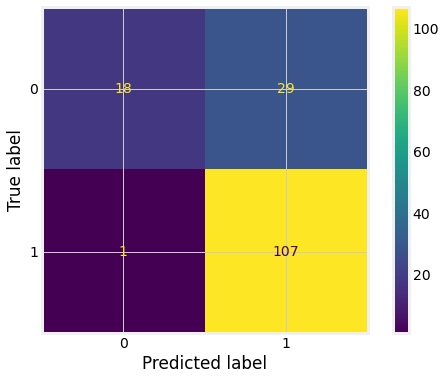

In [398]:
metrics.plot_confusion_matrix(logreg,X_test,y_test)

#### Classification Report (LogReg)
- [Skip to KNN Score and Metrics for Comparison](#Classification-Report-(KNN))

In [399]:
from sklearn.metrics import classification_report
logistic_normal = (classification_report(y_test, y_pred))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.95      0.38      0.55        47
           1       0.79      0.99      0.88       108

    accuracy                           0.81       155
   macro avg       0.87      0.69      0.71       155
weighted avg       0.84      0.81      0.78       155



In [400]:
#Model's RMSE and R^2 score 
print('Training error: ',np.sqrt(metrics.mean_squared_error(y_train, logreg.predict(X_train)))) #error in train
print('Testing error: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #error in test
print('Training R2: ',metrics.r2_score(y_train,logreg.predict(X_train)))
print('Testing R2: ',metrics.r2_score(y_test,logreg.predict(X_test)))

Training error:  0.4216370213557839
Testing error:  0.43994134506405985
Training R2:  0.18961696739474498
Testing R2:  0.08392434988179676


In [401]:
from sklearn.model_selection import cross_val_score

#Cross Validation

#cv = number of folds
kf = model_selection.KFold(n_splits=5, shuffle=True)

#^Out of sample RMSE
print(np.sqrt(np.mean(-cross_val_score(logreg, X_test, y_test, cv=5, scoring='neg_mean_squared_error'))))

#R-square value (default scoring)
print(np.mean(cross_val_score(logreg, X_test, y_test, cv=5))) 

0.4472135954999579
0.8


In [402]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num
0,0.0,5849.000000,0.0,140.741294,360.0,1.0,1.0,0.0,1.0,0.0,2.0
1,1.0,10785.235294,1508.0,128.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0
2,0.0,3000.000000,0.0,66.000000,360.0,1.0,1.0,1.0,1.0,1.0,2.0
3,0.0,2583.000000,2358.0,120.000000,360.0,1.0,1.0,1.0,0.0,0.0,2.0
4,0.0,6000.000000,0.0,141.000000,360.0,1.0,1.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900.000000,0.0,71.000000,360.0,1.0,0.0,0.0,1.0,0.0,0.0
610,3.0,4106.000000,0.0,40.000000,180.0,1.0,1.0,1.0,1.0,0.0,0.0
611,1.0,8072.000000,240.0,253.000000,360.0,1.0,1.0,1.0,1.0,0.0,2.0
612,2.0,7583.000000,0.0,187.000000,360.0,1.0,1.0,1.0,1.0,0.0,2.0


In [403]:
datatest

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num
0,0.0,5720.000000,0.0,110.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0
1,1.0,10785.235294,1500.0,126.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0
2,2.0,5000.000000,1800.0,208.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0
4,0.0,3276.000000,0.0,78.0,360.0,1.0,1.0,0.0,0.0,0.0,2.0
5,0.0,2165.000000,3422.0,152.0,360.0,1.0,1.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
361,1.0,2269.000000,2167.0,99.0,360.0,1.0,1.0,1.0,1.0,0.0,1.0
362,3.0,4009.000000,1777.0,113.0,360.0,1.0,1.0,1.0,0.0,1.0,2.0
363,0.0,4158.000000,709.0,115.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0
365,0.0,5000.000000,2393.0,158.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0


In [404]:
#Prediction for records where Loan Status has not been assigned 
datatest['Loan_Status']=logreg.predict(datatest)

/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [405]:
datatest.groupby('Loan_Status').mean()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num
Loan_Status,,,,,,,,,,,
0,0.909574,5701.643206,400.994681,134.079602,345.770622,0.861702,0.771277,0.611702,0.781915,0.117021,1.111702
1,0.581197,3157.811966,3339.418803,139.621720,337.464233,0.811966,0.837607,0.717949,0.760684,0.094017,1.042735


##### KNN Nearest Model
- [Return to Contents](#Contents)

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [407]:
#Setting K=1
knn = KNeighborsClassifier(n_neighbors=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(y_pred_class)
print(len(y_pred_class))

[1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1
 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0
 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0
 1 1 1 1 1 0 0]
155


In [408]:
#Null Accuracy
most_freq_class = y_train.value_counts().index[0]
print(y_train.value_counts())
print(y_test.value_counts()[most_freq_class] / len(y_test))

1    243
0    117
Name: Loan_Status, dtype: int64
0.6967741935483871


In [409]:
#Accuracy of above model
metrics.accuracy_score(y_test, y_pred_class)

0.6838709677419355

/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.p

/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.p

/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.p

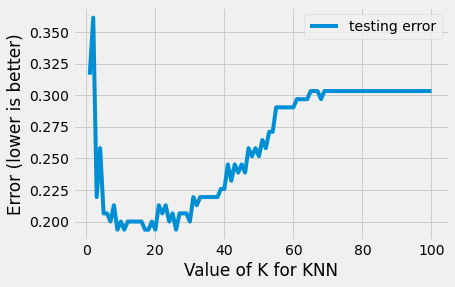

In [410]:
#Findig the best value of K 

k_range = list(range(1, 101))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

plt.style.use('fivethirtyeight')
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)

df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [411]:
df[df.index<20].sort_values(by='testing error')

,training error,testing error
K,,
18,0.337864,0.193548
17,0.337864,0.193548
9,0.415534,0.193548
11,0.409709,0.193548
19,0.322330,0.200000
7,0.425243,0.200000
12,0.438835,0.200000
10,0.427184,0.200000
14,0.427184,0.200000


In [412]:
#Setting K=18
knn = KNeighborsClassifier(n_neighbors=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print(y_pred_class)
print(len(y_pred_class))

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 1]
155


#### Score and Metrics (KNN)

In [413]:
print(metrics.accuracy_score(y_test, y_pred_class))

0.8


In [414]:
metrics.confusion_matrix(y_test, y_pred_class)
#TN = 18 #FP = 29
#FN = 2  #TP = 106

array([[ 18,  29],
       [  2, 106]])

/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


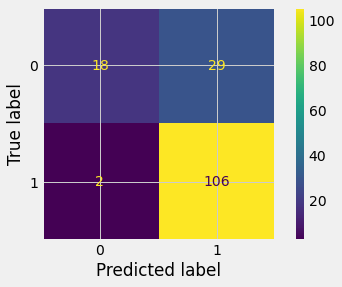

In [415]:
metrics.plot_confusion_matrix(knn,X_test,y_test)

#### Classification Report (KNN)
- [Skip to LogReg Score and Metrics for Comparison](#Classification-Report-(LogReg))

In [416]:
Knn_normal = (classification_report(y_test, y_pred_class))
print(Knn_normal)

              precision    recall  f1-score   support

           0       0.90      0.38      0.54        47
           1       0.79      0.98      0.87       108

    accuracy                           0.80       155
   macro avg       0.84      0.68      0.70       155
weighted avg       0.82      0.80      0.77       155



In [417]:
#RMSE & R^2 
print(np.sqrt(metrics.mean_squared_error(y_train, knn.predict(X_train)))) #error in train
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #error in test
print(metrics.r2_score(y_train,knn.predict(X_train)))
print(metrics.r2_score(y_test,knn.predict(X_test)))

0.4183300132670378
0.43994134506405985
0.20227920227920204
0.053388494877856574


In [418]:
from sklearn.model_selection import cross_val_score

#Cross Validation

#cv = number of folds
kf = model_selection.KFold(n_splits=5, shuffle=True)

#^Out of sample RMSE
print(np.sqrt(np.mean(-cross_val_score(knn, X_test, y_test, cv=5, scoring='neg_mean_squared_error'))))

#R-square value (default scoring)
print(np.mean(cross_val_score(knn, X_test, y_test, cv=5))) 

0.5143113152870138
0.735483870967742


In [419]:
datatest

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num,Loan_Status
0,0.0,5720.000000,0.0,110.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0,0
1,1.0,10785.235294,1500.0,126.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0,0
2,2.0,5000.000000,1800.0,208.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0,0
4,0.0,3276.000000,0.0,78.0,360.0,1.0,1.0,0.0,0.0,0.0,2.0,0
5,0.0,2165.000000,3422.0,152.0,360.0,1.0,1.0,1.0,0.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1.0,2269.000000,2167.0,99.0,360.0,1.0,1.0,1.0,1.0,0.0,1.0,1
362,3.0,4009.000000,1777.0,113.0,360.0,1.0,1.0,1.0,0.0,1.0,2.0,0
363,0.0,4158.000000,709.0,115.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0,0
365,0.0,5000.000000,2393.0,158.0,360.0,1.0,1.0,1.0,1.0,0.0,0.0,0


In [420]:
#RUN THIS IF Loan_Status STILL APPEARS ON datatest FROM PREV MODEL
#removing target prediction from datatest, so that we can apply Knn model 
datatest = datatest.drop('Loan_Status', axis = 1)

#### Target Dataset prediction of Loan Status

In [421]:
#Prediction for records where Loan Status has not been assigned 
datatest['Loan_Status']=knn.predict(datatest)
datatest.head()

/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num,Loan_Status
0,0.0,5720.000000,0.0,110.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0,1
1,1.0,10785.235294,1500.0,126.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0,1
2,2.0,5000.000000,1800.0,208.0,360.0,1.0,1.0,1.0,1.0,0.0,2.0,1
4,0.0,3276.000000,0.0,78.0,360.0,1.0,1.0,0.0,0.0,0.0,2.0,1
5,0.0,2165.000000,3422.0,152.0,360.0,1.0,1.0,1.0,0.0,1.0,2.0,1


In [422]:
datatest.groupby('Loan_Status').mean()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num
Loan_Status,,,,,,,,,,,
0,0.510204,3538.938776,3443.163265,148.280435,326.702825,0.897959,0.816327,0.673469,0.755102,0.102041,1.102041
1,0.835938,4952.987980,1161.656250,133.894395,345.624038,0.832031,0.792969,0.648438,0.777344,0.109375,1.082031


In [423]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         305 non-null    float64
 1   ApplicantIncome    305 non-null    float64
 2   CoapplicantIncome  305 non-null    float64
 3   LoanAmount         305 non-null    float64
 4   Loan_Amount_Term   305 non-null    float64
 5   Credit_History     305 non-null    float64
 6   Gender_num         305 non-null    float64
 7   Married_num        305 non-null    float64
 8   Education_num      305 non-null    float64
 9   Self_Employed_num  305 non-null    float64
 10  property_Area_num  305 non-null    float64
 11  Loan_Status        305 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 31.0 KB


##### Input Form to determine Eligibility
- [Return to Contents](#Contents)

In [424]:
#Form to fill
Dependents = input("Dependents: ")
Gender = input("Gender (Male or Female): ")
Married = input("Married (Yes or No): ")
Education = input("Education Level (Graduate or Not Graduate): ")
Self_Employed = input("Self-Employed (Yes or No): ")
property_Area = input("Type of Property Area (Urban or Rural or Semiurban): ")
ApplicantIncome = input("Annual Income: ")
CoapplicantIncome = input("Coapplicant's Annual Income: ")
LoanAmount = input("Loan Amount Requested (in thousands): ")
Loan_Amount_Term = input("Loan Tenor (in months): ")
Credit_History = input("Past Credit History (1=good, 0=bad): ")


Dependents: 1
Gender (Male or Female): Male
Married (Yes or No): Yes
Education Level (Graduate or Not Graduate): Graduate
Self-Employed (Yes or No): No
Type of Property Area (Urban or Rural or Semiurban): Urban
Annual Income: 50000
Coapplicant's Annual Income: 0
Loan Amount Requested (in thousands): 400
Loan Tenor (in months): 300
Past Credit History (1=good, 0=bad): 1


In [425]:
# initialize list elements
data = [Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area]
# Create the pandas DataFrame with column name is provided explicitly
X_new = pd.DataFrame(data).T        
X_new.columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','property_Area']

#Transform and create Dataframe of inputs
# Transform/clean datatest data 
#datatest = datatest.drop('Loan_ID', axis = 1)
#datatest = datatest.drop('Loan_Status', axis = 1)

#Transform Gender
X_new['Gender_num']=X_new['Gender']
X_new['Gender_num'].replace({'Male':'1'},inplace=True)
X_new['Gender_num'].replace({'Female':'0'},inplace=True)
X_new.drop('Gender', axis = 1,inplace=True)

#Transforming Married
X_new['Married_num']=X_new['Married']
X_new['Married_num'].replace({'Yes':'1'},inplace=True)
X_new['Married_num'].replace({'No':'0'},inplace=True)
X_new.drop('Married', axis = 1,inplace=True)

#Transforming Dependents (currently an object)
X_new['Dependents'] = pd.to_numeric(X_new['Dependents'])

#Transforming Education (currently an object)
X_new['Education_num']=X_new['Education']
X_new['Education_num'].replace({'Graduate':'1'},inplace=True)
X_new['Education_num'].replace({'Not Graduate':'0'},inplace=True)
X_new.drop('Education', axis = 1,inplace=True)

#Transforming Self_Employed (currently an object)
X_new['Self_Employed_num']=X_new['Self_Employed']
X_new['Self_Employed_num'].replace({'Yes':'1'},inplace=True)
X_new['Self_Employed_num'].replace({'No':'0'},inplace=True)
X_new.drop('Self_Employed', axis = 1,inplace=True)

#Transforming property_Area (currently an object)
X_new['property_Area_num']=X_new['property_Area']
X_new['property_Area_num'].replace({'Semiurban':'1'},inplace=True)
X_new['property_Area_num'].replace({'Rural':'0'},inplace=True)
X_new['property_Area_num'].replace({'Urban':'2'},inplace=True)
X_new.drop('property_Area', axis = 1,inplace=True)

X_new = X_new.astype({'Dependents':'float','Gender_num':'float','Married_num':'float','Education_num':'float','Self_Employed_num':'float','property_Area_num':'float'})

#Loan Status Prediction using the above 2 models
y_logreg = logreg.predict(X_new)
y_knn = knn.predict(X_new)

X_new['Loan_Status_logreg']=y_logreg
X_new.head()



/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_num,Married_num,Education_num,Self_Employed_num,property_Area_num,Loan_Status_logreg
0,1.0,50000,0,400,300,1,1.0,1.0,1.0,0.0,2.0,0


#### Objective 2: Estimate Loan Amount to be provided using Linear Regression
- [Return to Contents](#Contents)

##### Linear Regression

In [426]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             515 non-null    object 
 1   Married            515 non-null    object 
 2   Dependents         515 non-null    object 
 3   Education          515 non-null    object 
 4   Self_Employed      515 non-null    object 
 5   ApplicantIncome    515 non-null    float64
 6   CoapplicantIncome  515 non-null    float64
 7   LoanAmount         515 non-null    float64
 8   Loan_Amount_Term   515 non-null    float64
 9   Credit_History     515 non-null    float64
 10  property_Area      515 non-null    object 
 11  Loan_Status        515 non-null    int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 52.3+ KB


In [427]:
#Transformation of categorical variables to numerical variables 
#Gender
#Married
#Education
#property_Area
Gender_dum = pd.get_dummies(final.Gender, prefix='Gender',drop_first=False).iloc[:, :]
Married_dum=pd.get_dummies(final.Married, prefix='Married',drop_first=False).iloc[:, :]
Education_dum=pd.get_dummies(final.Education, prefix='Education',drop_first=False).iloc[:, :]
property_Area_dum=pd.get_dummies(final.property_Area, prefix='property_Area',drop_first=False).iloc[:, :]
Self_Employed_dum=pd.get_dummies(final.Self_Employed, prefix='Self_Employed',drop_first=False).iloc[:, :]

final2 = pd.concat([final,Gender_dum,Married_dum,Education_dum,property_Area_dum,Self_Employed_dum], axis=1)
final2.drop(['Gender','Married','Education','Self_Employed','property_Area'],axis=1,inplace=True)
final2

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,property_Area_Rural,property_Area_Semiurban,property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,0,5849.000000,0.0,140.741294,360.0,1.0,1,0,1,1,0,1,0,0,0,1,1,0
1,1,10785.235294,1508.0,128.000000,360.0,1.0,0,0,1,0,1,1,0,1,0,0,1,0
2,0,3000.000000,0.0,66.000000,360.0,1.0,1,0,1,0,1,1,0,0,0,1,0,1
3,0,2583.000000,2358.0,120.000000,360.0,1.0,1,0,1,0,1,0,1,0,0,1,1,0
4,0,6000.000000,0.0,141.000000,360.0,1.0,1,0,1,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900.000000,0.0,71.000000,360.0,1.0,1,1,0,1,0,1,0,1,0,0,1,0
610,3,4106.000000,0.0,40.000000,180.0,1.0,1,0,1,0,1,1,0,1,0,0,1,0
611,1,8072.000000,240.0,253.000000,360.0,1.0,1,0,1,0,1,1,0,0,0,1,1,0
612,2,7583.000000,0.0,187.000000,360.0,1.0,1,0,1,0,1,1,0,0,0,1,1,0


<AxesSubplot:>

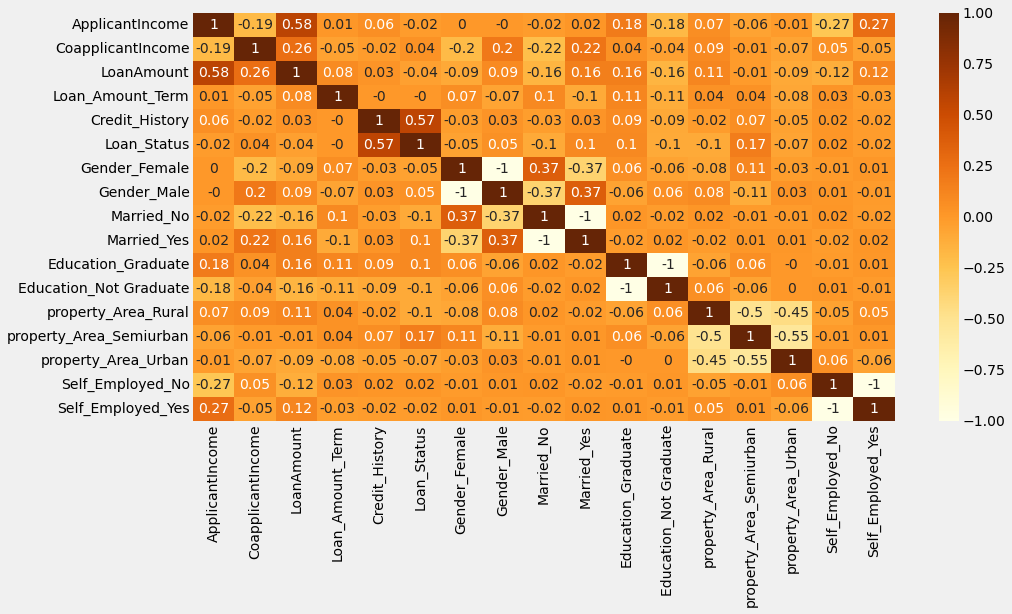

In [428]:
#Checking for Multicollinearity
correlation1 = final2.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(final2.corr().round(2), annot = True, cmap = 'YlOrBr')

#### Model Iteration 1 - all variables
- [Model Iteration 1](#Model-Iteration-1---all-variables)
    - [Score](#Model-1-Score)
- [Model Iteration 2](#Model-Iteration-2)
    - [Score](#Model-2-Score)
- [Model Iteration 3](#Model-Iteration-3)
    - [Score](#Model-3-Score)

In [429]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [430]:
#Setting Variables 
dat=final2[final2['Loan_Status']==1]
dat = dat.astype({'Dependents':'float','Gender_Female':'float','Gender_Male':'float','Married_No':'float','Married_Yes':'float','Education_Graduate':'float','Education_Not Graduate':'float','property_Area_Rural':'float','property_Area_Semiurban':'float','property_Area_Urban':'float','Self_Employed_No':'float','Self_Employed_Yes':'float'})

y=dat['LoanAmount']
X=dat.drop(['LoanAmount','Loan_Status'],axis=1)
feature_cols=X.columns

In [431]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.3)

# Iteration 1 - Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

#Model
k=len(X.columns)
n=len(y)
print(linreg.intercept_)
print(linreg.coef_)
list(zip(feature_cols, linreg.coef_))

-12.411331856261626
[ 7.95872757e+00  1.29850824e-02  1.28162568e-02  1.17235472e-01
  1.60669681e+01 -9.18715824e-01  9.18715824e-01 -4.87696730e+00
  4.87696730e+00  6.90002909e+00 -6.90002909e+00  8.24427605e+00
  1.10415865e+00 -9.34843470e+00  1.84060450e+00 -1.84060450e+00]


[('Dependents', 7.958727572945409),
 ('ApplicantIncome', 0.012985082377117598),
 ('CoapplicantIncome', 0.012816256757231128),
 ('Loan_Amount_Term', 0.11723547162033152),
 ('Credit_History', 16.066968119543603),
 ('Gender_Female', -0.9187158235702703),
 ('Gender_Male', 0.9187158235702756),
 ('Married_No', -4.876967298343723),
 ('Married_Yes', 4.876967298343726),
 ('Education_Graduate', 6.900029092250913),
 ('Education_Not Graduate', -6.900029092250914),
 ('property_Area_Rural', 8.24427605063905),
 ('property_Area_Semiurban', 1.1041586515079949),
 ('property_Area_Urban', -9.34843470214705),
 ('Self_Employed_No', 1.8406044991436203),
 ('Self_Employed_Yes', -1.8406044991436266)]

#### Model 1 Score

In [433]:
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, linreg.predict(X_train)))) #error in train
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #error in test
print("Train R-square: ",metrics.r2_score(y_train,linreg.predict(X_train)))
print("Test R-square: ",metrics.r2_score(y_test,linreg.predict(X_test)))
print("Adj R-square: ",1 - ((1-linreg.score(X_test,y_test))*(n-1))/(n-k-1))

Train RMSE:  46.19117056567066
Test RMSE:  64.49720755716865
Train R-square:  0.470071653578657
Test R-square:  0.36222926144771317
Adj R-square:  0.33167736978053775


In [434]:
from sklearn.model_selection import cross_val_score

#Cross Validation

#cv = number of folds
kf = model_selection.KFold(n_splits=5, shuffle=True)

#^Out of sample RMSE
print(np.sqrt(np.mean(-cross_val_score(linreg, X_test, y_test, cv=5, scoring='neg_mean_squared_error'))))

#R-square value (default scoring)
print(np.mean(cross_val_score(linreg, X_test, y_test, cv=5))) 

77.47736605166261
0.043363459899919965


#### To determine degree of multicollinearity among features

In [254]:
#Use of VIF to check degree of multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data.sort_values(by='VIF')

/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
4,Credit_History,1.020673
3,Loan_Amount_Term,1.034501
2,CoapplicantIncome,1.181259
0,Dependents,1.228845
1,ApplicantIncome,1.275014
5,Gender_Female,inf
6,Gender_Male,inf
7,Married_No,inf
8,Married_Yes,inf
9,Education_Graduate,inf


#### Feature Selection

In [435]:
#Test using Feature Selection - Stepwise Regression based on statsmodel
import statsmodels.api as sm
def stepwise_selection(data,X,y,SL_in=0.05,SL_out = 0.05):
    initial_features = list(X.columns)
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(y, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [436]:
stepwise_selection(dat,X,y,SL_in=0.10,SL_out = 0.10)

/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/1157513982.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/1157513982.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/1157513982.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/var/folders/v0/6z8pjvr11kn3v9fr5dv27sv00000gp/T/ipykernel_2061/1157513982.py:8: FutureWarning: The default dtype for empty Ser

['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Married_Yes']

#### Model Iteration 2 
- [Model Iteration 1](#Model-Iteration-1---all-variables)
    - [Score](#Model-1-Score)
- [Model Iteration 2](#Model-Iteration-2)
    - [Score](#Model-2-Score)
- [Model Iteration 3](#Model-Iteration-3)
    - [Score](#Model-3-Score)

In [443]:
#Iteration #2 
y=dat['LoanAmount']
feature_cols=['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Married_Yes']
X=dat[feature_cols]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.3)

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

#Model info
k=len(X.columns)
n=len(y)
print(linreg.intercept_)
print(linreg.coef_)
list(zip(feature_cols, linreg.coef_))

-2.2187234817039325
[1.34906792e-02 1.31854358e-02 1.32969328e-01 1.59356466e+01]


[('ApplicantIncome', 0.013490679219987234),
 ('CoapplicantIncome', 0.01318543575129305),
 ('Loan_Amount_Term', 0.1329693281476115),
 ('Married_Yes', 15.935646615318115)]

#### Model 2 Score

In [444]:
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, linreg.predict(X_train)))) #error in train
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #error in test
print("Train R-square: ",metrics.r2_score(y_train,linreg.predict(X_train)))
print("Test R-square: ",metrics.r2_score(y_test,linreg.predict(X_test)))
print("Adj R-square: ",1 - ((1-linreg.score(X_test,y_test))*(n-1))/(n-k-1))

Train RMSE:  47.44143614867413
Test RMSE:  62.82992593395146
Train R-square:  0.44099605896499694
Test R-square:  0.39477639087031546
Adj R-square:  0.38777958614049257


In [445]:
from sklearn.model_selection import cross_val_score

#Cross Validation

#cv = number of folds
kf = model_selection.KFold(n_splits=5, shuffle=True)

#^Out of sample RMSE
print(np.sqrt(np.mean(-cross_val_score(linreg, X_test, y_test, cv=5, scoring='neg_mean_squared_error'))))

#R-square value (default scoring)
print(np.mean(cross_val_score(linreg, X_test, y_test, cv=5))) 

71.12283785573932
0.2196450698338161


#### Model Iteration 3
- [Model Iteration 1](#Model-Iteration-1---all-variables)
    - [Score](#Model-1-Score)
- [Model Iteration 2](#Model-Iteration-2)
    - [Score](#Model-2-Score)
- [Model Iteration 3](#Model-Iteration-3)
    - [Score](#Model-3-Score)

In [441]:
#Iteration #3
y=dat['LoanAmount']
feature_cols=['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','property_Area_Rural','property_Area_Urban','property_Area_Semiurban','Married_Yes','Married_No']
X=dat[feature_cols]

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.3)

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

#Model info
k=len(X.columns)
n=len(y)
print(linreg.intercept_)
print(linreg.coef_)
list(zip(feature_cols, linreg.coef_))

10.127890676064055
[ 0.01338072  0.01269076  0.12413159  7.68279049 -8.76423238  1.08144189
  8.53143761 -8.53143761]


[('ApplicantIncome', 0.013380720599879947),
 ('CoapplicantIncome', 0.012690760584742989),
 ('Loan_Amount_Term', 0.12413159239461422),
 ('property_Area_Rural', 7.682790492882677),
 ('property_Area_Urban', -8.764232382581515),
 ('property_Area_Semiurban', 1.081441889698838),
 ('Married_Yes', 8.531437613573981),
 ('Married_No', -8.531437613573983)]

#### Model 3 Score

In [442]:
print("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, linreg.predict(X_train)))) #error in train
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #error in test
print("Train R-square: ",metrics.r2_score(y_train,linreg.predict(X_train)))
print("Test R-square: ",metrics.r2_score(y_test,linreg.predict(X_test)))
print("Adj R-square: ",1 - ((1-linreg.score(X_test,y_test))*(n-1))/(n-k-1))

Train RMSE:  47.03999631304102
Test RMSE:  63.107724280237264
Train R-square:  0.4504163896866107
Test R-square:  0.3894126472936229
Adj R-square:  0.3751299022010761


In [266]:
from sklearn.model_selection import cross_val_score

#Cross Validation

#cv = number of folds
kf = model_selection.KFold(n_splits=5, shuffle=True)

#^Out of sample RMSE
print(np.sqrt(np.mean(-cross_val_score(linreg, X_test, y_test, cv=5, scoring='neg_mean_squared_error'))))

#R-square value (default scoring)
print(np.mean(cross_val_score(linreg, X_test, y_test, cv=5))) 

72.65039777248397
0.17373964945165557


#### Input Form to Assess Loan Amount for Customer

- [Return to Contents](#Contents)
- [Model Iteration 1](#Model-Iteration-1---all-variables)
    - [Score](#Model-1-Score)
- [Model Iteration 2](#Model-Iteration-2)
    - [Score](#Model-2-Score)
- [Model Iteration 3](#Model-Iteration-3)
    - [Score](#Model-3-Score)

In [2420]:
#RE-RUN MODEL ITERATION 2 BEFORE CONTINUING

In [446]:
#Form to fill
Married_Yes = input("Married? (0 for No, 1 for Yes): ")
#property_Area_Urban = input("Type of Property Area (1 if Urban, 0 if otherwise): ")
ApplicantIncome = input("Annual Income: ")
CoapplicantIncome = input("Coapplicant's Annual Income: ")
Loan_Amount_Term = input("Loan Tenor (in months): ")

Married? (0 for No, 1 for Yes): 1
Annual Income: 50000
Coapplicant's Annual Income: 300
Loan Tenor (in months): 400


In [447]:
# initialize list elements
data = [Married_Yes,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term]
# Create the pandas DataFrame with column name is provided explicitly
X_new = pd.DataFrame(data).T        
X_new.columns=['Married_Yes','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']

X_new = X_new.astype({'Married_Yes':'float'})

feature_cols=['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Married_Yes']
X_new['Target Loan Amount'] = linreg.predict(X_new[feature_cols])
X_new['Target Loan Amount'] 

0    745.394246
Name: Target Loan Amount, dtype: float64

#To do list:
* Write Conclusions - EDA, customer segments, choice of model (pros/cons)
* Slides

## Part 4: *Presentation*
> Summarize and present your findings.

Present your findings to an audience that may include non-technical executive stakeholders. Summarize and break down your problem, approach, and recommendations in a manner that different levels of expertise will find informative and persuasive.

Create a presentation that walks through your goals, approach, results, and recommendations. Keep slides simple - no more than 2-3 pieces of information per slide. When in doubt, use visuals!

Finally, be prepared to explain and defend your model to an inquisitive audience.

> **Optional:** For a stretch challenge, try any of the following: creating an interactive demo of your model in action, explaining how you would deploy your model in a production environment, or discussing how to evaluate your solution's performance over time.